# Análisis Exploratorio de Datos (EDA) para el Dataset de Calificaciones

## Introducción
El propósito de este análisis es explorar el dataset de calificaciones y obtener una comprensión profunda de las relaciones entre las variables, identificar patrones y posibles valores atípicos, y preparar los datos para futuros modelos predictivos. En este informe, se incluyen análisis bivariados, ANOVA y métricas de asociación, tales como el cálculo de **Cramér's V**.


In [22]:
import sys
import os
import pandas as pd
from dotenv import load_dotenv
load_dotenv()

current_dir = os.path.dirname(os.path.abspath('__file__'))
project_root = os.path.abspath(os.path.join(current_dir, '..', '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from scripts.eda_notes_analyzer import EDANotesAnalyzer

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo BlueLight personalizado
def configurar_estilo_bluelight():
    sns.set_theme(style="whitegrid")
    plt.rcParams.update({
        "axes.facecolor": "#F5F9FF",
        "figure.facecolor": "#F5F9FF",
        "axes.edgecolor": "#CCCCCC",
        "axes.labelcolor": "#333333",
        "xtick.color": "#333333",
        "ytick.color": "#333333",
        "text.color": "#003366",
        "axes.titleweight": "bold",
        "axes.titlesize": 14,
        "axes.titlecolor": "#003366"
    })

## 2.1. Carga de dataset de Calificaciones limpio

Cargar la fuente de datos procesada con limpieza aplicada a las calificaciones y agregar columna de riesgo

In [24]:
df_limpio = pd.read_csv("../../data/processed/data_clean_notes_2023_2025.csv")

df_limpio['Grado'] = df_limpio['Grado'].astype(object)
df_limpio['Periodo'] = df_limpio['Periodo'].astype(object)
df_limpio['Año'] = df_limpio['Año'].astype(object)
df_limpio.info()
df_limpio.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32676 entries, 0 to 32675
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sede                32676 non-null  object 
 1   Estudiante          32676 non-null  object 
 2   Grado               32676 non-null  object 
 3   Grupo               32676 non-null  object 
 4   Periodo             32676 non-null  object 
 5   Año                 32676 non-null  object 
 6   Intensidad_Horaria  32676 non-null  int64  
 7   Asignatura          32676 non-null  object 
 8   Cog                 32571 non-null  float64
 9   Proc                32571 non-null  float64
 10  Act                 32676 non-null  int64  
 11  Axi                 32676 non-null  int64  
 12  Docente             32676 non-null  object 
 13  Resultado           32676 non-null  int64  
 14  Nivel               32676 non-null  object 
 15  Identificación      32676 non-null  object 
dtypes: f

Intensidad_Horaria           Cog          Proc           Act  \
count        32676.000000  32571.000000  32571.000000  32676.000000   
mean             2.738983     84.033250     83.779743     88.159750   
std              1.504686      9.603383     10.031476      8.995464   
min              1.000000      7.000000      7.000000      0.000000   
25%              1.000000     79.000000     79.000000     85.000000   
50%              3.000000     86.000000     86.000000     90.000000   
75%              4.000000     91.000000     91.000000     95.000000   
max              7.000000    100.000000    100.000000    100.000000   

                Axi     Resultado  
count  32676.000000  32676.000000  
mean      89.829722     85.386002  
std        8.319957      8.331330  
min        0.000000      5.000000  
25%       87.000000     81.000000  
50%       90.000000     87.000000  
75%       95.000000     91.000000  
max      100.000000    100.000000

In [25]:
eda = EDANotesAnalyzer(df_limpio)

In [26]:
# Crear variable de riesgo
df_riesgo = eda.create_risk_variable(threshold=80)
df_riesgo[['Estudiante', 'Resultado', 'En_Riesgo']].head()
df_riesgo.to_csv("../../data/processed/data_clean_notes_2023_2024_2025_riesgo.csv", index=False)

## 2.2. Analisis parcial de variables relevantes  
- promedio de estudiantes  
- verificar si todos los estudiantes estan en todos los periodos  
- Graficar histograma por estudiante


In [27]:
#  Promedio por estudiante
promedio_por_estudiante=eda.promedio_por_estudiante()
print(promedio_por_estudiante.head(10))

                                          Estudiante  Periodo   Año  Resultado
0  000000b08384e8448524db481342db0d3b454fd3901036...        1  2025       88.0
1  002c13fe9f81216ce55992422e02d85a24ceacabeb0fae...        1  2023       87.5
2  002c13fe9f81216ce55992422e02d85a24ceacabeb0fae...        1  2024       91.5
3  002c13fe9f81216ce55992422e02d85a24ceacabeb0fae...        2  2023       91.0
4  002c13fe9f81216ce55992422e02d85a24ceacabeb0fae...        2  2024       92.0
5  002c13fe9f81216ce55992422e02d85a24ceacabeb0fae...        3  2023       90.5
6  002c13fe9f81216ce55992422e02d85a24ceacabeb0fae...        3  2024       92.0
7  002c13fe9f81216ce55992422e02d85a24ceacabeb0fae...        4  2023       91.0
8  002c13fe9f81216ce55992422e02d85a24ceacabeb0fae...        4  2024       90.0
9  0040d267edc503ad5cec5d1d05a930e8ebdd1c0e73298b...        1  2023       93.5


In [28]:
# Verificar si todos los estudiantes tienen todos los periodos
verificar_periodos_completos=eda.verificar_periodos_completos()
print(verificar_periodos_completos.head(20))

                                           Estudiante   Año  \
0   000000b08384e8448524db481342db0d3b454fd3901036...  2025   
8   007c9576b1d5462ba014bf28f52e47975aafba7e23c722...  2025   
14  01c684403f88fff69a4f08efa41ba586ab2b48d439f77e...  2025   
15  02739ac024d11820be388248649a77b1ce7f4539b1ba0c...  2025   
18  02f973a636937d7f3d567ebb49ebf963f74683156d2c99...  2025   
19  0371ce717b6dedee1b47bb63bc9b2193023101cebea4a1...  2025   
22  03a24538dc859c3270e7b56a00bd6581de54e49e1aa89b...  2025   
24  041b5595924486f4bfca7e3a06383302bfb499a2a1feef...  2025   
25  04e265f2cbd7025a39f2695725c8e9fd60c3a6395d78c7...  2025   
27  0521814a3853c48741d502f35fda7667515cf006e2a1fd...  2025   
29  05f9f6faaf2ff9b6b5fc9f35eab73dd956393ebe87a280...  2025   
31  076479825fbcc2a08ad6004573f818018e72b771b56e71...  2024   
34  0783a02beab5c2313526e4cb8827d303383f1ee5f99ceb...  2025   
38  08ab0a29f140a4f6bd69ae927c3b0afce186253d9dc817...  2025   
40  08f008a4176bc0907f0173bec529d5368ca41b21222820...  

c:\Users\Cathe\Documents\MAA\GIT-REPOS\formar-innovar\scripts\eda_notes_analyzer.py:77: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='Asignatura', loc='upper right', bbox_to_anchor=(1, 1), fontsize='small')
c:\Users\Cathe\Documents\MAA\GIT-REPOS\formar-innovar\scripts\eda_notes_analyzer.py:77: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='Asignatura', loc='upper right', bbox_to_anchor=(1, 1), fontsize='small')
c:\Users\Cathe\Documents\MAA\GIT-REPOS\formar-innovar\scripts\eda_notes_analyzer.py:77: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='Asignatura', loc='upper

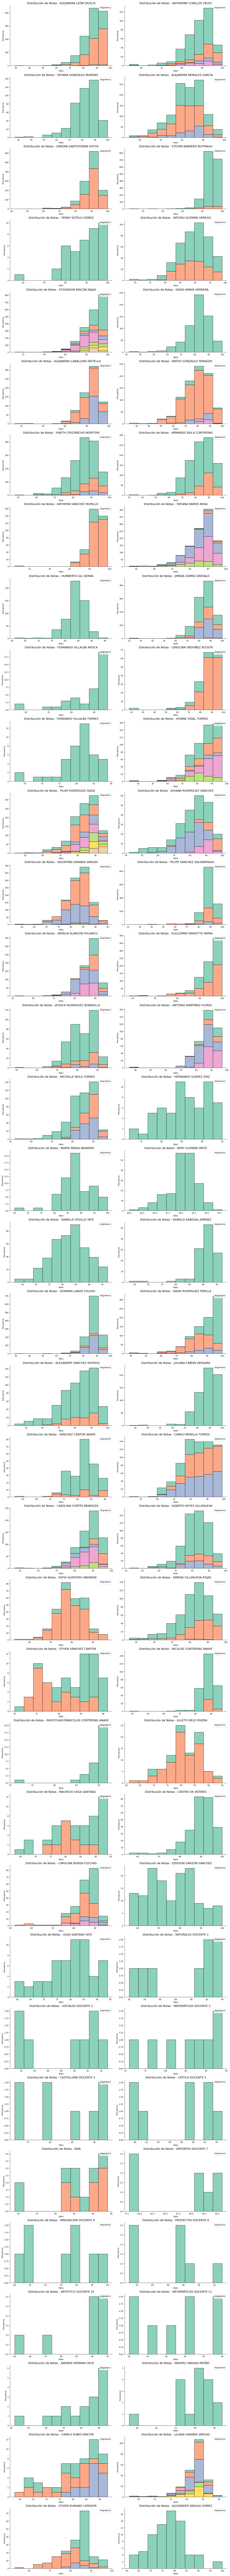

In [29]:
# 8. Histogramas por docente
eda.plot_histograma_por_docente_asignatura()

## 2.3. Analisis bivariado  
- Analisis entre variables numericas  
- Analisis entre variables categoricas  
- Analisis entre variables numericas / categoricas  
- Analisis de Varianza con ANOVA  

Nota: todos los resultados seran expotados


1. Análisis Bivariado: Variables Numéricas vs Numéricas
Para investigar las relaciones entre dos variables numéricas, se realiza un gráfico de dispersión y se calculan las correlaciones.


Estadísticas descriptivas de la columna 'Intensidad_Horaria':
count    32676.000000
mean         2.738983
std          1.504686
min          1.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Intensidad_Horaria, dtype: float64

Estadísticas descriptivas de la columna 'Cog':
count    32571.000000
mean        84.033250
std          9.603383
min          7.000000
25%         79.000000
50%         86.000000
75%         91.000000
max        100.000000
Name: Cog, dtype: float64


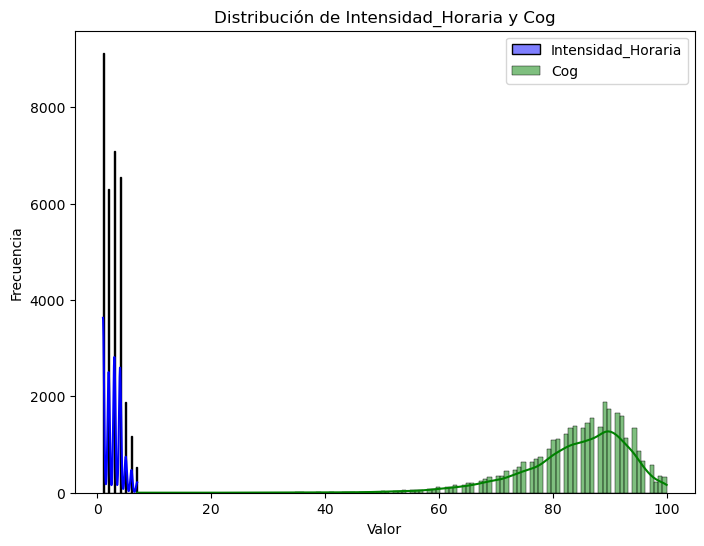

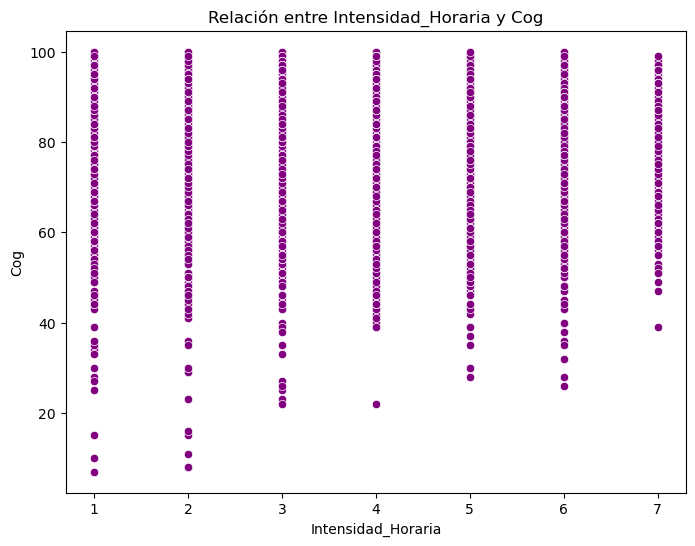

- Coeficiente de correlación de Pearson entre Intensidad_Horaria y Cog: -0.32
- Coeficiente de correlación de Spearman entre Intensidad_Horaria y Cog: -0.34

Resumen de los resultados:
            Columna 1 Columna 2  Coef. Pearson  Coef. Spearman
0  Intensidad_Horaria       Cog      -0.323133       -0.335341

Estadísticas descriptivas de la columna 'Intensidad_Horaria':
count    32676.000000
mean         2.738983
std          1.504686
min          1.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Intensidad_Horaria, dtype: float64

Estadísticas descriptivas de la columna 'Proc':
count    32571.000000
mean        83.779743
std         10.031476
min          7.000000
25%         79.000000
50%         86.000000
75%         91.000000
max        100.000000
Name: Proc, dtype: float64


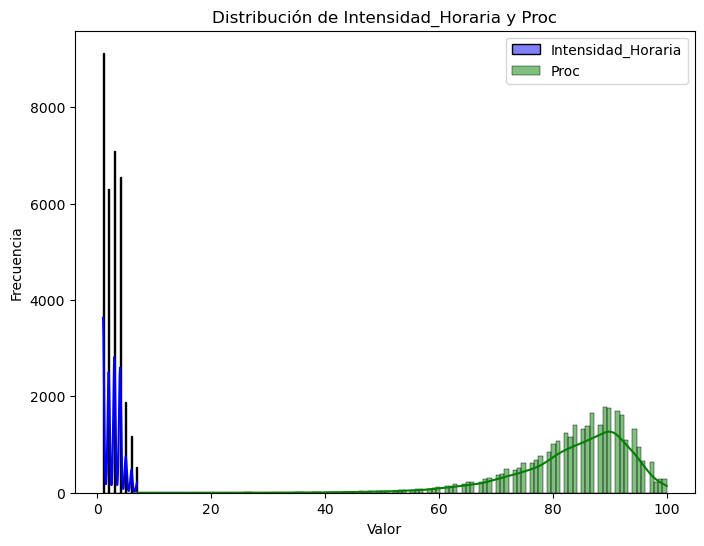

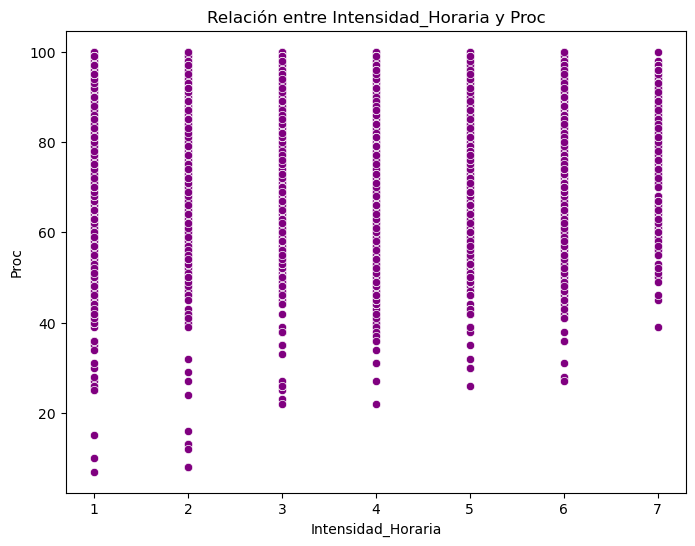

- Coeficiente de correlación de Pearson entre Intensidad_Horaria y Proc: -0.29
- Coeficiente de correlación de Spearman entre Intensidad_Horaria y Proc: -0.31

Resumen de los resultados:
            Columna 1 Columna 2  Coef. Pearson  Coef. Spearman
0  Intensidad_Horaria      Proc       -0.28879       -0.313957

Estadísticas descriptivas de la columna 'Intensidad_Horaria':
count    32676.000000
mean         2.738983
std          1.504686
min          1.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Intensidad_Horaria, dtype: float64

Estadísticas descriptivas de la columna 'Act':
count    32676.000000
mean        88.159750
std          8.995464
min          0.000000
25%         85.000000
50%         90.000000
75%         95.000000
max        100.000000
Name: Act, dtype: float64


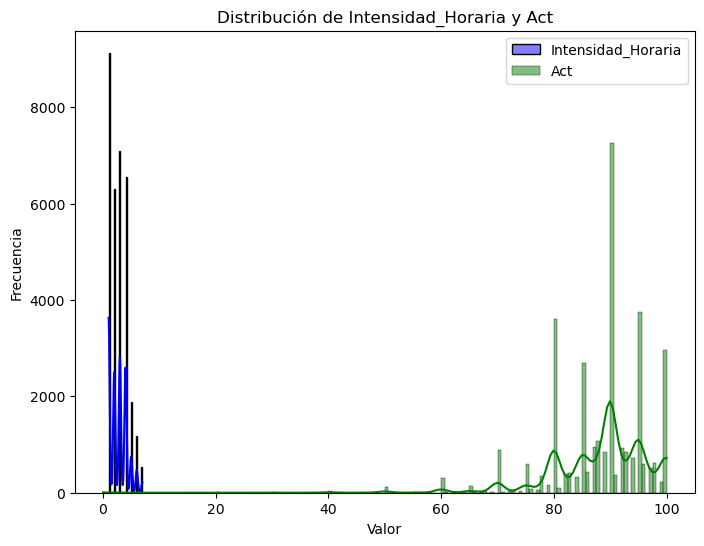

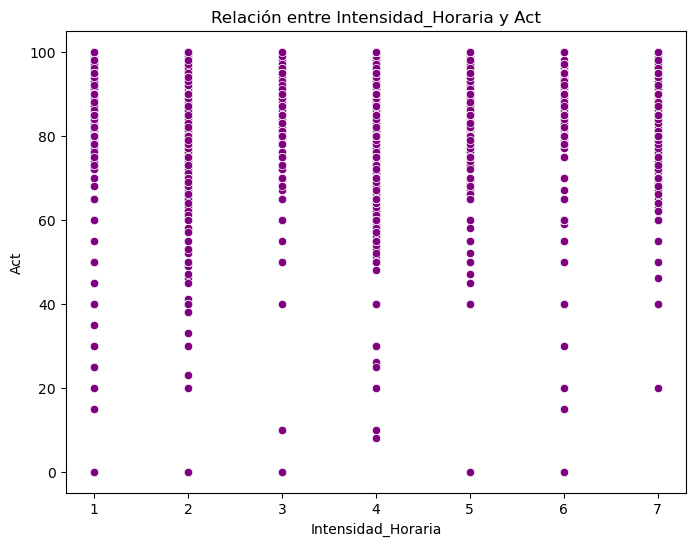

- Coeficiente de correlación de Pearson entre Intensidad_Horaria y Act: -0.03
- Coeficiente de correlación de Spearman entre Intensidad_Horaria y Act: -0.02

Resumen de los resultados:
            Columna 1 Columna 2  Coef. Pearson  Coef. Spearman
0  Intensidad_Horaria       Act      -0.032423       -0.015387

Estadísticas descriptivas de la columna 'Intensidad_Horaria':
count    32676.000000
mean         2.738983
std          1.504686
min          1.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Intensidad_Horaria, dtype: float64

Estadísticas descriptivas de la columna 'Axi':
count    32676.000000
mean        89.829722
std          8.319957
min          0.000000
25%         87.000000
50%         90.000000
75%         95.000000
max        100.000000
Name: Axi, dtype: float64


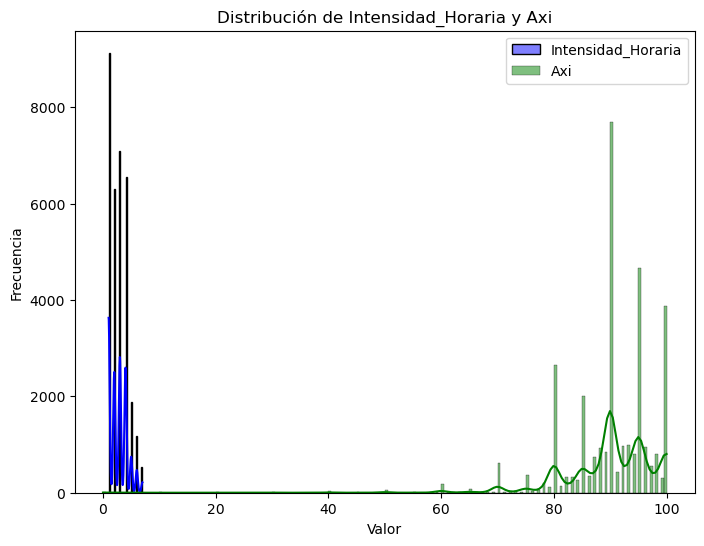

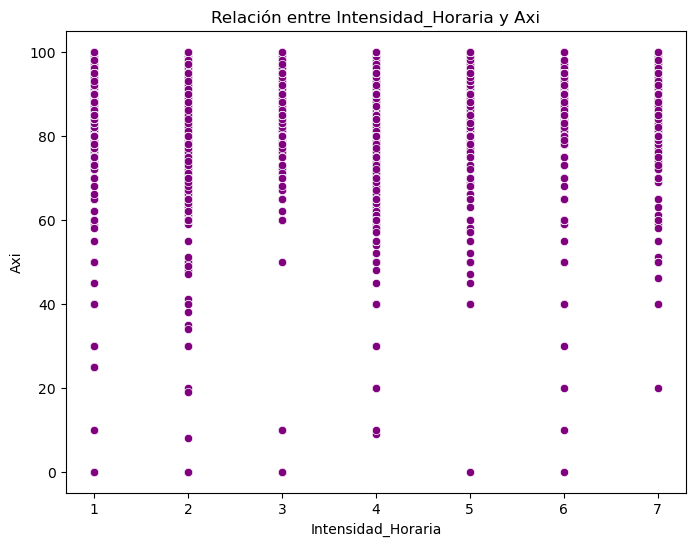

- Coeficiente de correlación de Pearson entre Intensidad_Horaria y Axi: -0.02
- Coeficiente de correlación de Spearman entre Intensidad_Horaria y Axi: 0.01

Resumen de los resultados:
            Columna 1 Columna 2  Coef. Pearson  Coef. Spearman
0  Intensidad_Horaria       Axi      -0.020643        0.005328

Estadísticas descriptivas de la columna 'Intensidad_Horaria':
count    32676.000000
mean         2.738983
std          1.504686
min          1.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Intensidad_Horaria, dtype: float64

Estadísticas descriptivas de la columna 'Resultado':
count    32676.000000
mean        85.386002
std          8.331330
min          5.000000
25%         81.000000
50%         87.000000
75%         91.000000
max        100.000000
Name: Resultado, dtype: float64


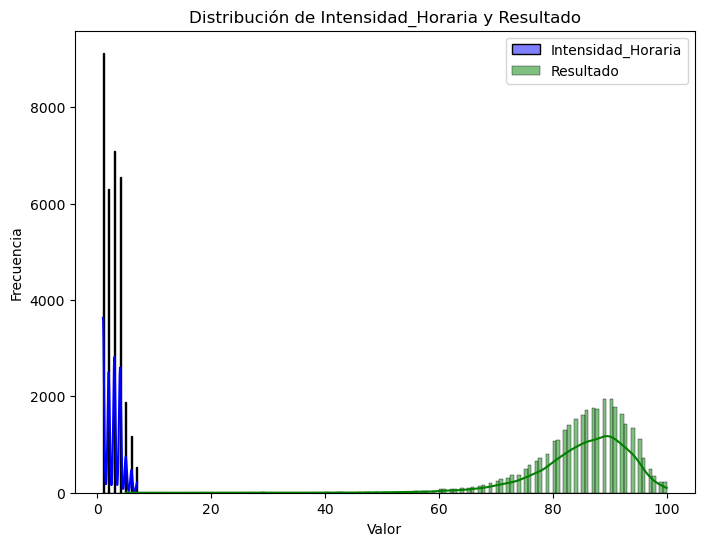

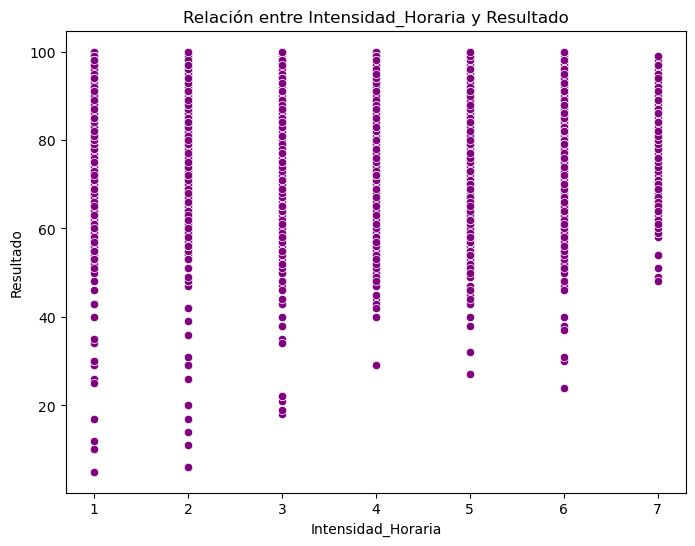

- Coeficiente de correlación de Pearson entre Intensidad_Horaria y Resultado: -0.26
- Coeficiente de correlación de Spearman entre Intensidad_Horaria y Resultado: -0.27

Resumen de los resultados:
            Columna 1  Columna 2  Coef. Pearson  Coef. Spearman
0  Intensidad_Horaria  Resultado       -0.25613       -0.274722

Estadísticas descriptivas de la columna 'Cog':
count    32571.000000
mean        84.033250
std          9.603383
min          7.000000
25%         79.000000
50%         86.000000
75%         91.000000
max        100.000000
Name: Cog, dtype: float64

Estadísticas descriptivas de la columna 'Intensidad_Horaria':
count    32676.000000
mean         2.738983
std          1.504686
min          1.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Intensidad_Horaria, dtype: float64


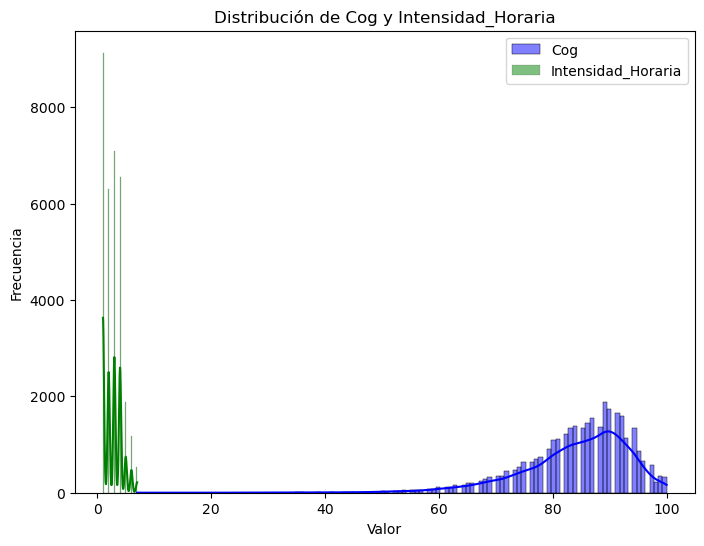

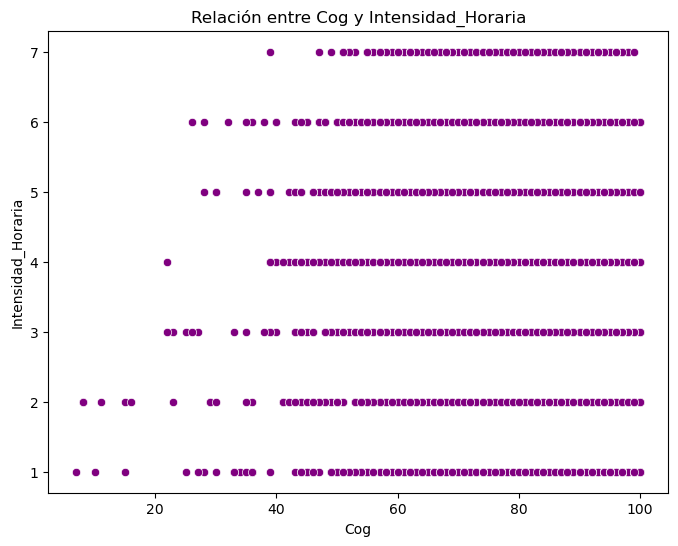

- Coeficiente de correlación de Pearson entre Cog y Intensidad_Horaria: -0.32
- Coeficiente de correlación de Spearman entre Cog y Intensidad_Horaria: -0.34

Resumen de los resultados:
  Columna 1           Columna 2  Coef. Pearson  Coef. Spearman
0       Cog  Intensidad_Horaria      -0.323133       -0.335341

Estadísticas descriptivas de la columna 'Cog':
count    32571.000000
mean        84.033250
std          9.603383
min          7.000000
25%         79.000000
50%         86.000000
75%         91.000000
max        100.000000
Name: Cog, dtype: float64

Estadísticas descriptivas de la columna 'Proc':
count    32571.000000
mean        83.779743
std         10.031476
min          7.000000
25%         79.000000
50%         86.000000
75%         91.000000
max        100.000000
Name: Proc, dtype: float64


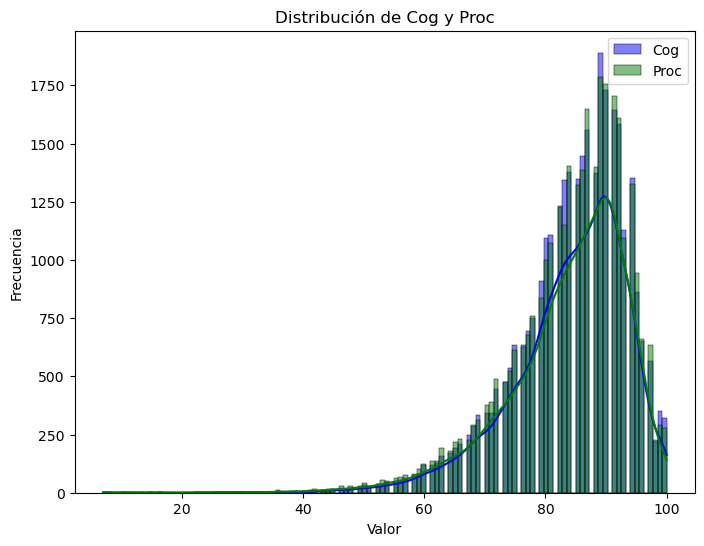

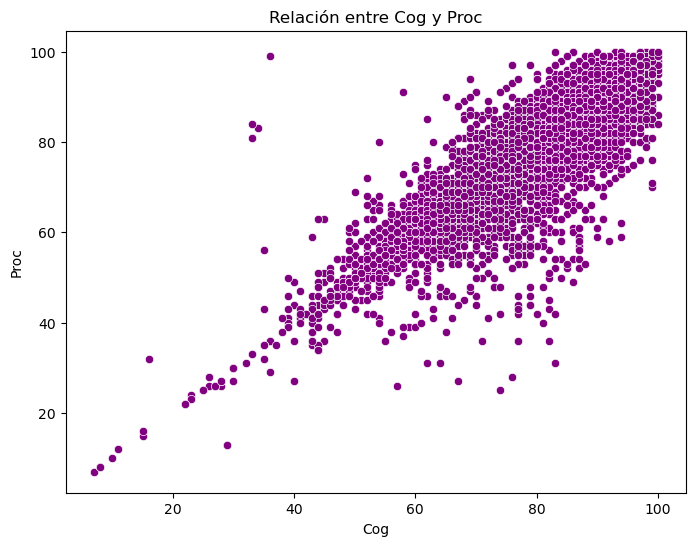

- Coeficiente de correlación de Pearson entre Cog y Proc: 0.93
- Coeficiente de correlación de Spearman entre Cog y Proc: 0.93

Resumen de los resultados:
  Columna 1 Columna 2  Coef. Pearson  Coef. Spearman
0       Cog      Proc       0.927633        0.930253

Estadísticas descriptivas de la columna 'Cog':
count    32571.000000
mean        84.033250
std          9.603383
min          7.000000
25%         79.000000
50%         86.000000
75%         91.000000
max        100.000000
Name: Cog, dtype: float64

Estadísticas descriptivas de la columna 'Act':
count    32676.000000
mean        88.159750
std          8.995464
min          0.000000
25%         85.000000
50%         90.000000
75%         95.000000
max        100.000000
Name: Act, dtype: float64


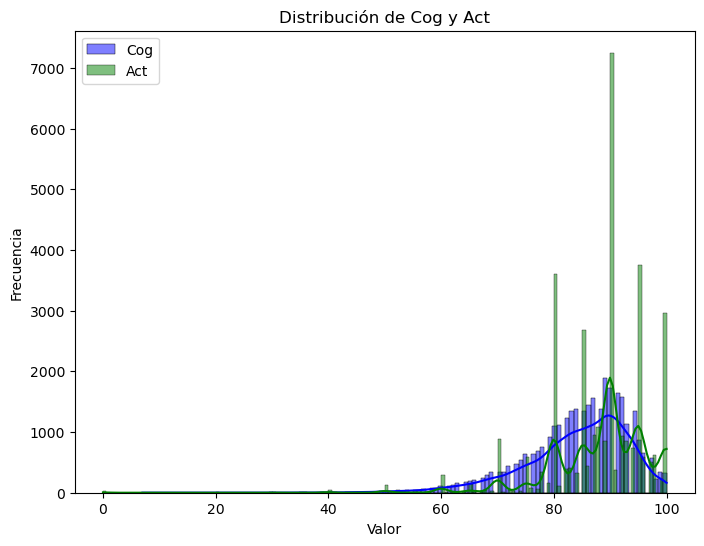

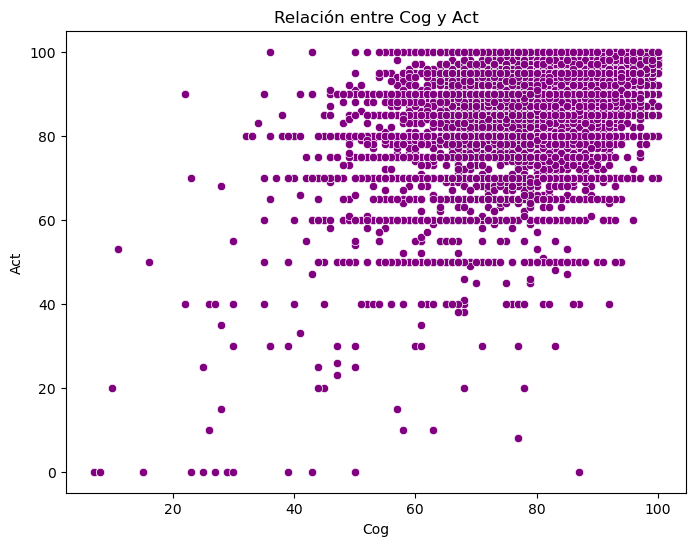

- Coeficiente de correlación de Pearson entre Cog y Act: 0.51
- Coeficiente de correlación de Spearman entre Cog y Act: 0.49

Resumen de los resultados:
  Columna 1 Columna 2  Coef. Pearson  Coef. Spearman
0       Cog       Act        0.50581        0.493785

Estadísticas descriptivas de la columna 'Cog':
count    32571.000000
mean        84.033250
std          9.603383
min          7.000000
25%         79.000000
50%         86.000000
75%         91.000000
max        100.000000
Name: Cog, dtype: float64

Estadísticas descriptivas de la columna 'Axi':
count    32676.000000
mean        89.829722
std          8.319957
min          0.000000
25%         87.000000
50%         90.000000
75%         95.000000
max        100.000000
Name: Axi, dtype: float64


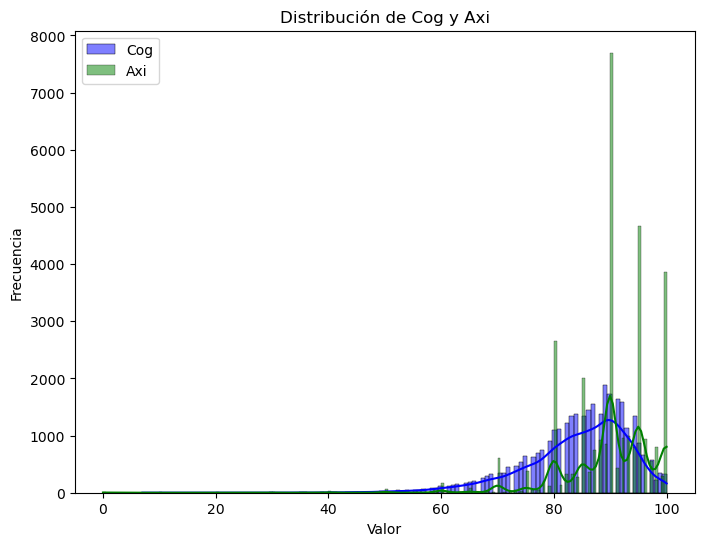

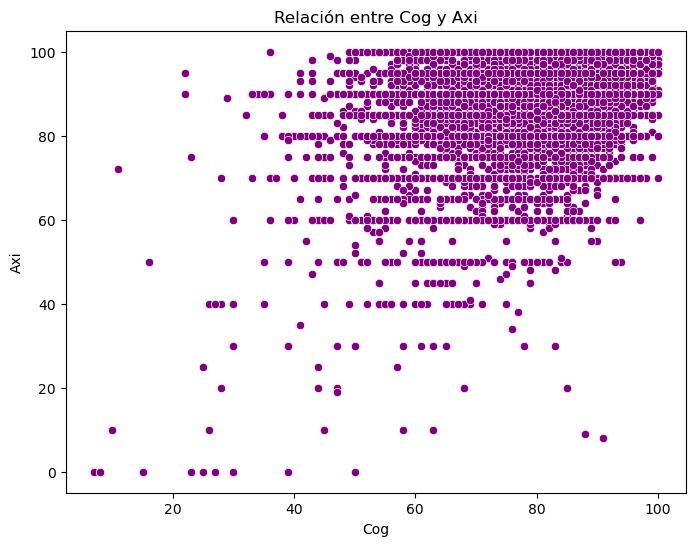

- Coeficiente de correlación de Pearson entre Cog y Axi: 0.42
- Coeficiente de correlación de Spearman entre Cog y Axi: 0.38

Resumen de los resultados:
  Columna 1 Columna 2  Coef. Pearson  Coef. Spearman
0       Cog       Axi       0.417411        0.382992

Estadísticas descriptivas de la columna 'Cog':
count    32571.000000
mean        84.033250
std          9.603383
min          7.000000
25%         79.000000
50%         86.000000
75%         91.000000
max        100.000000
Name: Cog, dtype: float64

Estadísticas descriptivas de la columna 'Resultado':
count    32676.000000
mean        85.386002
std          8.331330
min          5.000000
25%         81.000000
50%         87.000000
75%         91.000000
max        100.000000
Name: Resultado, dtype: float64


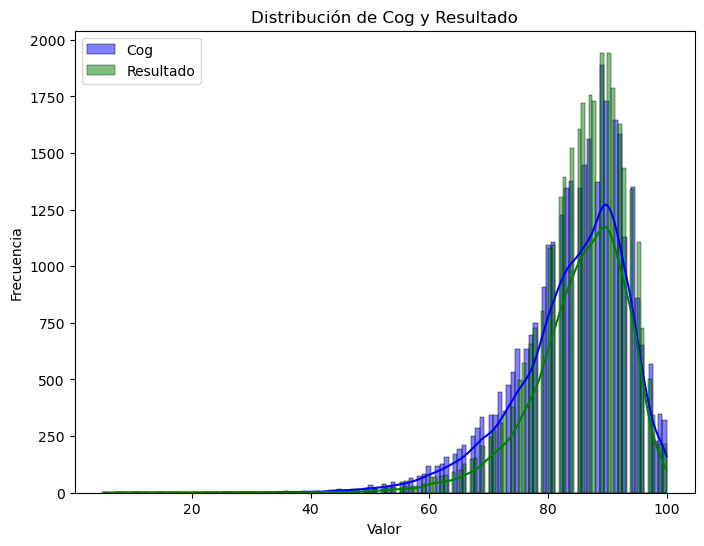

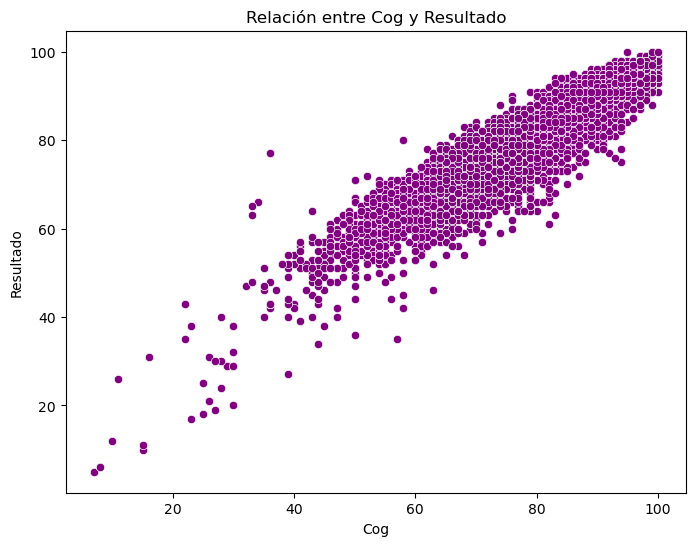

- Coeficiente de correlación de Pearson entre Cog y Resultado: 0.94
- Coeficiente de correlación de Spearman entre Cog y Resultado: 0.94

Resumen de los resultados:
  Columna 1  Columna 2  Coef. Pearson  Coef. Spearman
0       Cog  Resultado       0.944115        0.944834

Estadísticas descriptivas de la columna 'Proc':
count    32571.000000
mean        83.779743
std         10.031476
min          7.000000
25%         79.000000
50%         86.000000
75%         91.000000
max        100.000000
Name: Proc, dtype: float64

Estadísticas descriptivas de la columna 'Intensidad_Horaria':
count    32676.000000
mean         2.738983
std          1.504686
min          1.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Intensidad_Horaria, dtype: float64


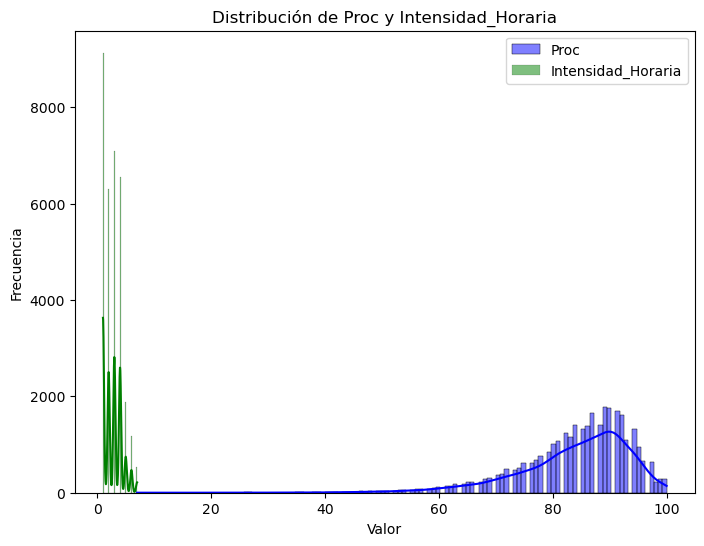

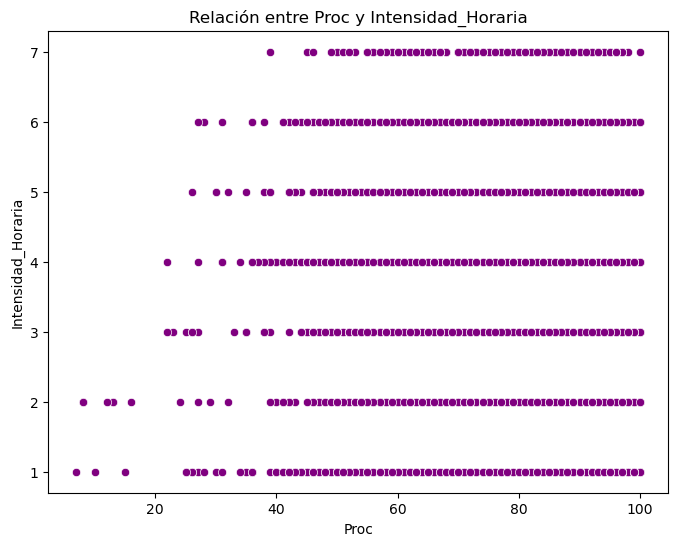

- Coeficiente de correlación de Pearson entre Proc y Intensidad_Horaria: -0.29
- Coeficiente de correlación de Spearman entre Proc y Intensidad_Horaria: -0.31

Resumen de los resultados:
  Columna 1           Columna 2  Coef. Pearson  Coef. Spearman
0      Proc  Intensidad_Horaria       -0.28879       -0.313957

Estadísticas descriptivas de la columna 'Proc':
count    32571.000000
mean        83.779743
std         10.031476
min          7.000000
25%         79.000000
50%         86.000000
75%         91.000000
max        100.000000
Name: Proc, dtype: float64

Estadísticas descriptivas de la columna 'Cog':
count    32571.000000
mean        84.033250
std          9.603383
min          7.000000
25%         79.000000
50%         86.000000
75%         91.000000
max        100.000000
Name: Cog, dtype: float64


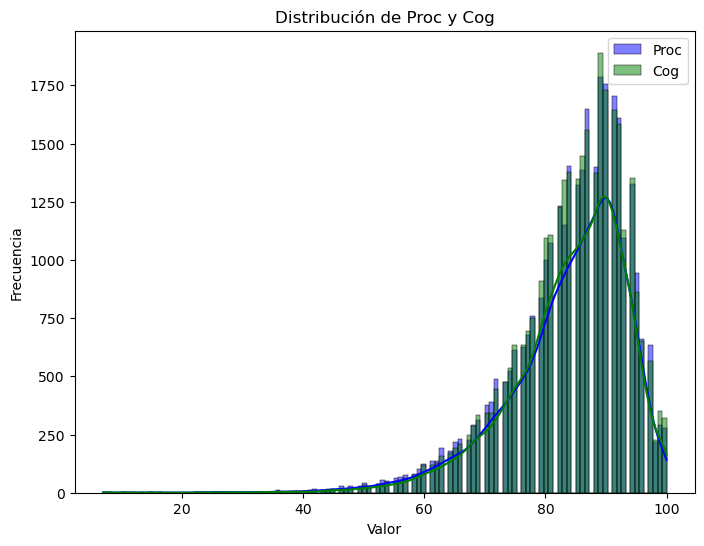

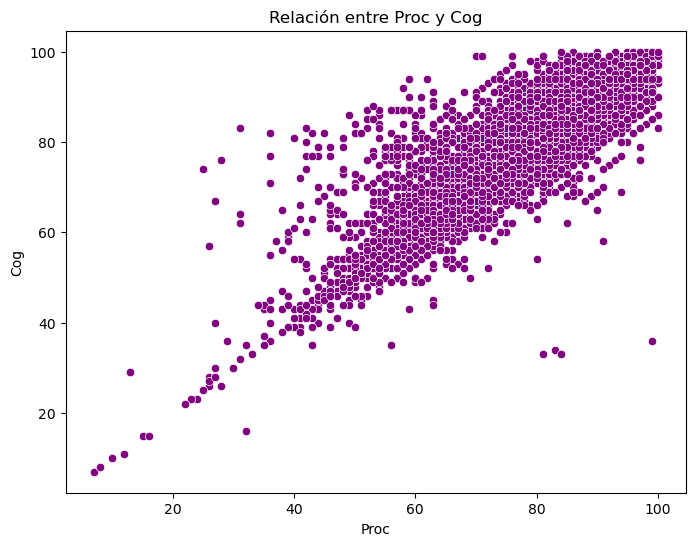

- Coeficiente de correlación de Pearson entre Proc y Cog: 0.93
- Coeficiente de correlación de Spearman entre Proc y Cog: 0.93

Resumen de los resultados:
  Columna 1 Columna 2  Coef. Pearson  Coef. Spearman
0      Proc       Cog       0.927633        0.930253

Estadísticas descriptivas de la columna 'Proc':
count    32571.000000
mean        83.779743
std         10.031476
min          7.000000
25%         79.000000
50%         86.000000
75%         91.000000
max        100.000000
Name: Proc, dtype: float64

Estadísticas descriptivas de la columna 'Act':
count    32676.000000
mean        88.159750
std          8.995464
min          0.000000
25%         85.000000
50%         90.000000
75%         95.000000
max        100.000000
Name: Act, dtype: float64


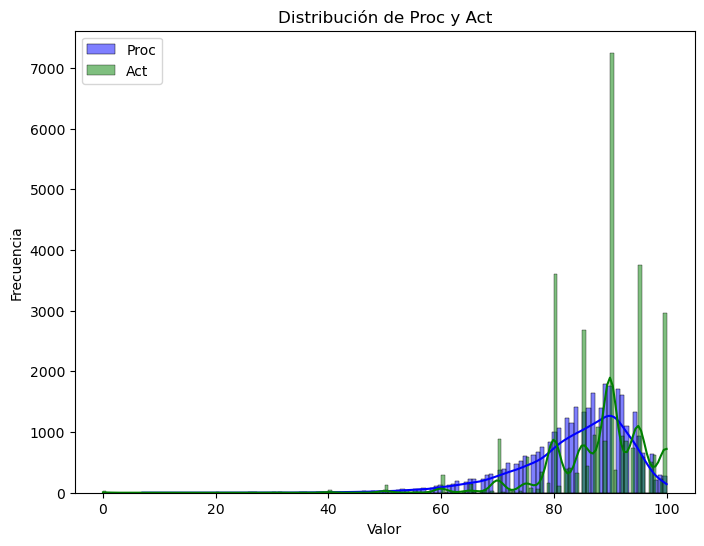

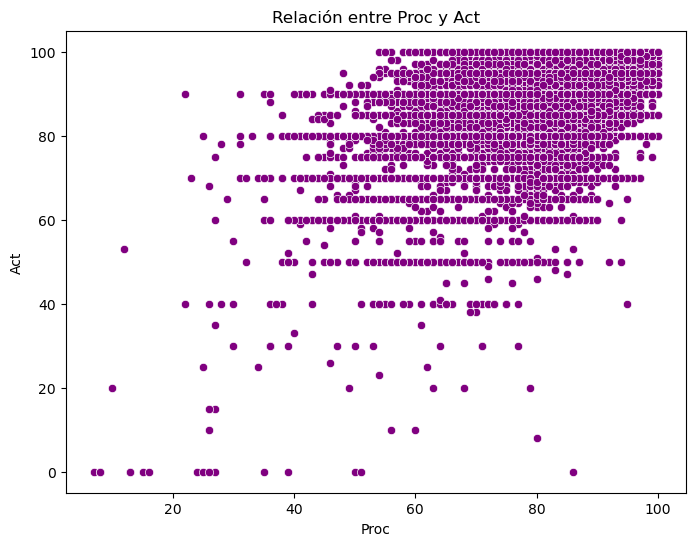

- Coeficiente de correlación de Pearson entre Proc y Act: 0.53
- Coeficiente de correlación de Spearman entre Proc y Act: 0.51

Resumen de los resultados:
  Columna 1 Columna 2  Coef. Pearson  Coef. Spearman
0      Proc       Act       0.526469        0.508344

Estadísticas descriptivas de la columna 'Proc':
count    32571.000000
mean        83.779743
std         10.031476
min          7.000000
25%         79.000000
50%         86.000000
75%         91.000000
max        100.000000
Name: Proc, dtype: float64

Estadísticas descriptivas de la columna 'Axi':
count    32676.000000
mean        89.829722
std          8.319957
min          0.000000
25%         87.000000
50%         90.000000
75%         95.000000
max        100.000000
Name: Axi, dtype: float64


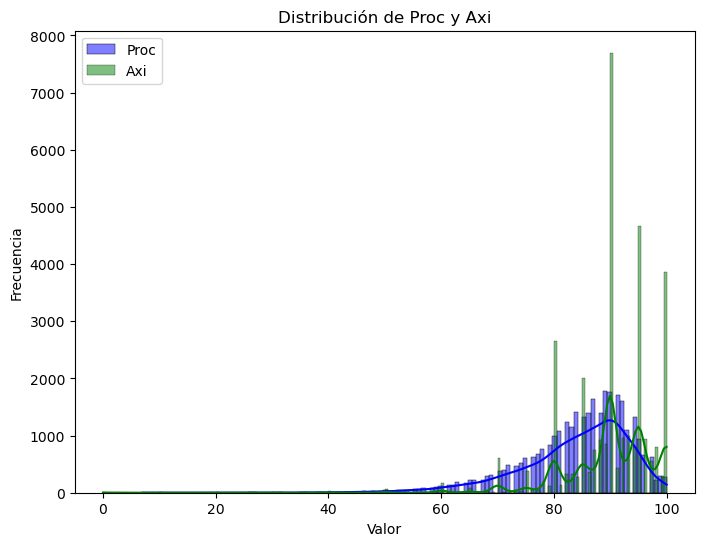

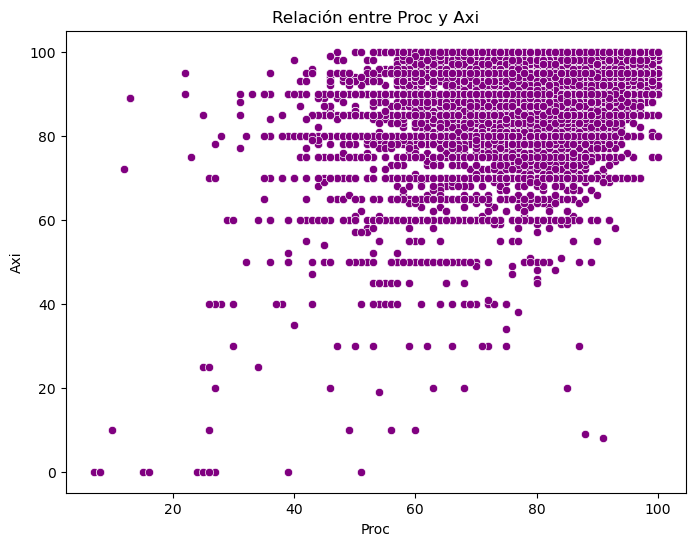

- Coeficiente de correlación de Pearson entre Proc y Axi: 0.43
- Coeficiente de correlación de Spearman entre Proc y Axi: 0.39

Resumen de los resultados:
  Columna 1 Columna 2  Coef. Pearson  Coef. Spearman
0      Proc       Axi       0.425534         0.39309

Estadísticas descriptivas de la columna 'Proc':
count    32571.000000
mean        83.779743
std         10.031476
min          7.000000
25%         79.000000
50%         86.000000
75%         91.000000
max        100.000000
Name: Proc, dtype: float64

Estadísticas descriptivas de la columna 'Resultado':
count    32676.000000
mean        85.386002
std          8.331330
min          5.000000
25%         81.000000
50%         87.000000
75%         91.000000
max        100.000000
Name: Resultado, dtype: float64


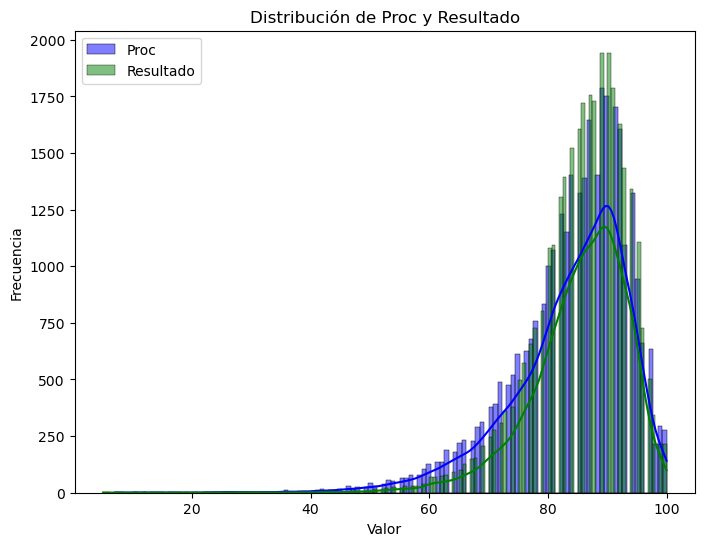

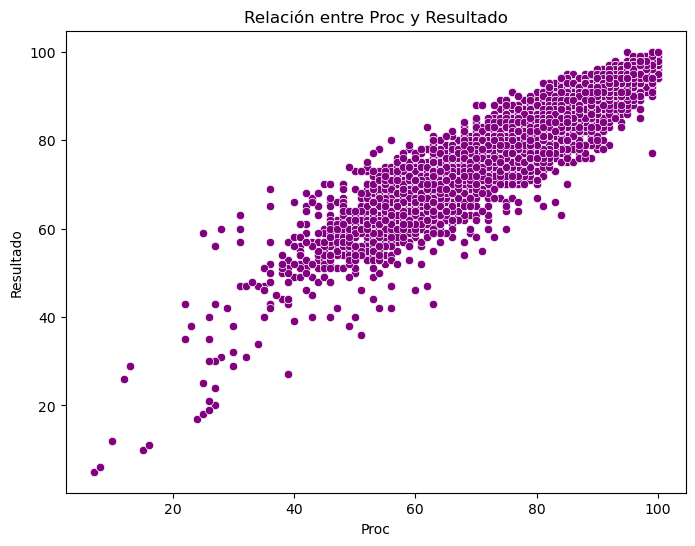

- Coeficiente de correlación de Pearson entre Proc y Resultado: 0.95
- Coeficiente de correlación de Spearman entre Proc y Resultado: 0.95

Resumen de los resultados:
  Columna 1  Columna 2  Coef. Pearson  Coef. Spearman
0      Proc  Resultado       0.950803        0.952052

Estadísticas descriptivas de la columna 'Act':
count    32676.000000
mean        88.159750
std          8.995464
min          0.000000
25%         85.000000
50%         90.000000
75%         95.000000
max        100.000000
Name: Act, dtype: float64

Estadísticas descriptivas de la columna 'Intensidad_Horaria':
count    32676.000000
mean         2.738983
std          1.504686
min          1.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Intensidad_Horaria, dtype: float64


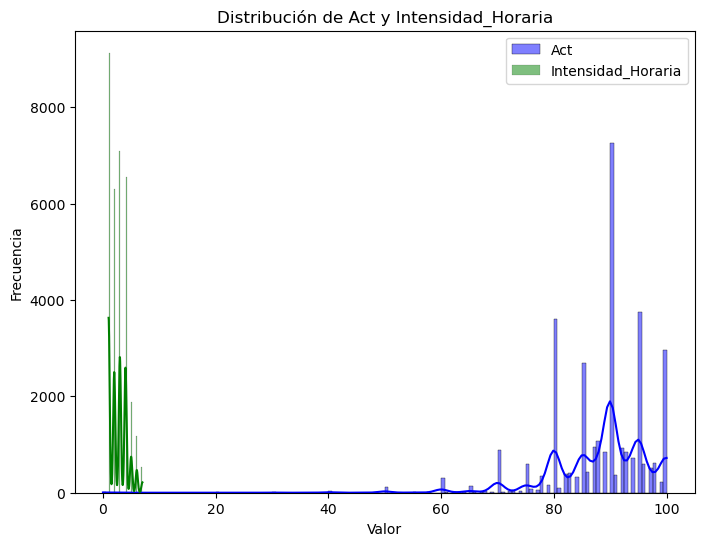

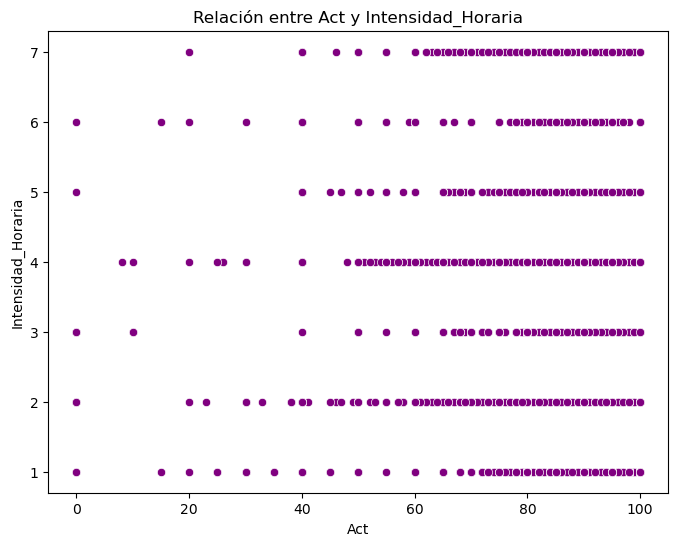

- Coeficiente de correlación de Pearson entre Act y Intensidad_Horaria: -0.03
- Coeficiente de correlación de Spearman entre Act y Intensidad_Horaria: -0.02

Resumen de los resultados:
  Columna 1           Columna 2  Coef. Pearson  Coef. Spearman
0       Act  Intensidad_Horaria      -0.032423       -0.015387

Estadísticas descriptivas de la columna 'Act':
count    32676.000000
mean        88.159750
std          8.995464
min          0.000000
25%         85.000000
50%         90.000000
75%         95.000000
max        100.000000
Name: Act, dtype: float64

Estadísticas descriptivas de la columna 'Cog':
count    32571.000000
mean        84.033250
std          9.603383
min          7.000000
25%         79.000000
50%         86.000000
75%         91.000000
max        100.000000
Name: Cog, dtype: float64


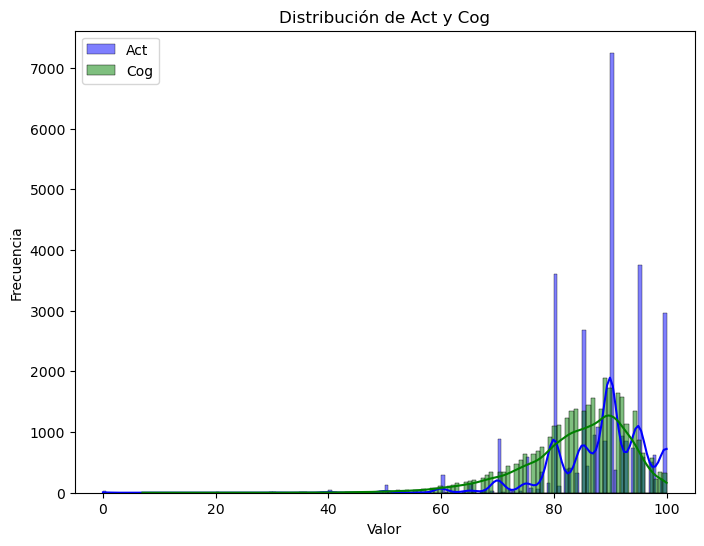

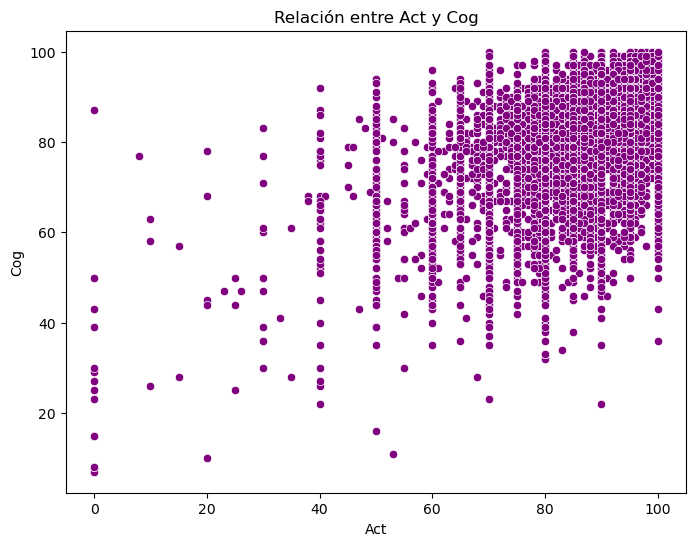

- Coeficiente de correlación de Pearson entre Act y Cog: 0.51
- Coeficiente de correlación de Spearman entre Act y Cog: 0.49

Resumen de los resultados:
  Columna 1 Columna 2  Coef. Pearson  Coef. Spearman
0       Act       Cog        0.50581        0.493785

Estadísticas descriptivas de la columna 'Act':
count    32676.000000
mean        88.159750
std          8.995464
min          0.000000
25%         85.000000
50%         90.000000
75%         95.000000
max        100.000000
Name: Act, dtype: float64

Estadísticas descriptivas de la columna 'Proc':
count    32571.000000
mean        83.779743
std         10.031476
min          7.000000
25%         79.000000
50%         86.000000
75%         91.000000
max        100.000000
Name: Proc, dtype: float64


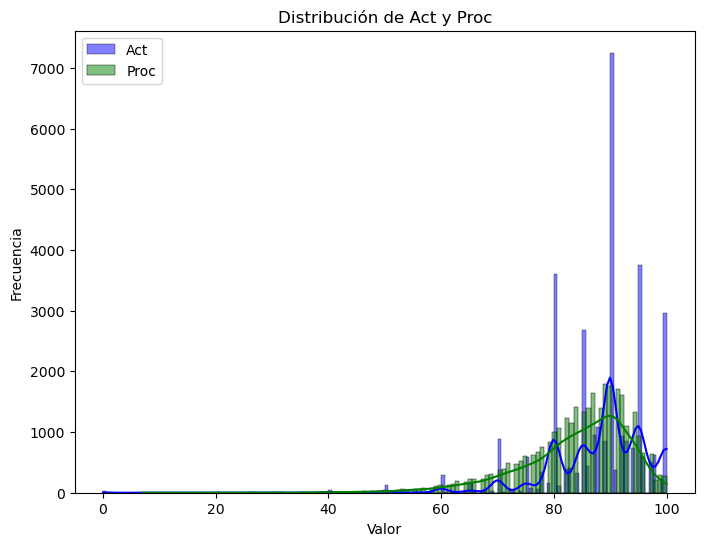

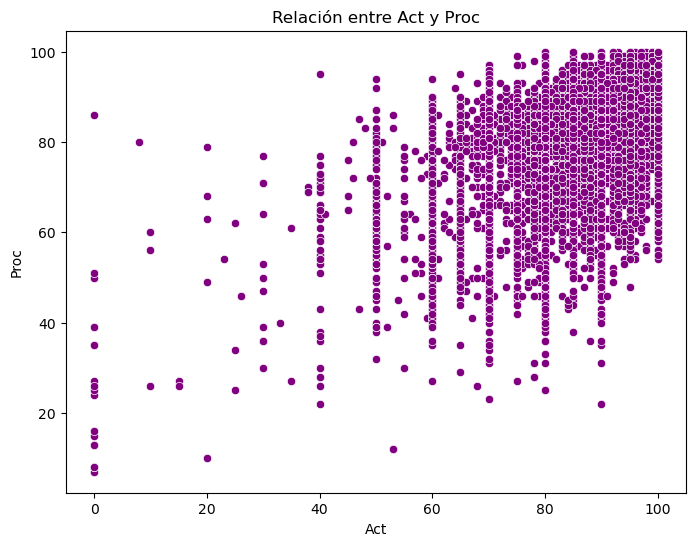

- Coeficiente de correlación de Pearson entre Act y Proc: 0.53
- Coeficiente de correlación de Spearman entre Act y Proc: 0.51

Resumen de los resultados:
  Columna 1 Columna 2  Coef. Pearson  Coef. Spearman
0       Act      Proc       0.526469        0.508344

Estadísticas descriptivas de la columna 'Act':
count    32676.000000
mean        88.159750
std          8.995464
min          0.000000
25%         85.000000
50%         90.000000
75%         95.000000
max        100.000000
Name: Act, dtype: float64

Estadísticas descriptivas de la columna 'Axi':
count    32676.000000
mean        89.829722
std          8.319957
min          0.000000
25%         87.000000
50%         90.000000
75%         95.000000
max        100.000000
Name: Axi, dtype: float64


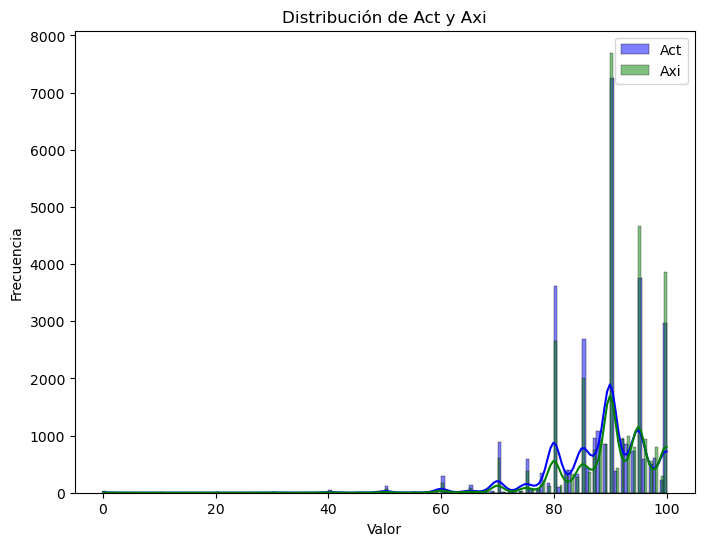

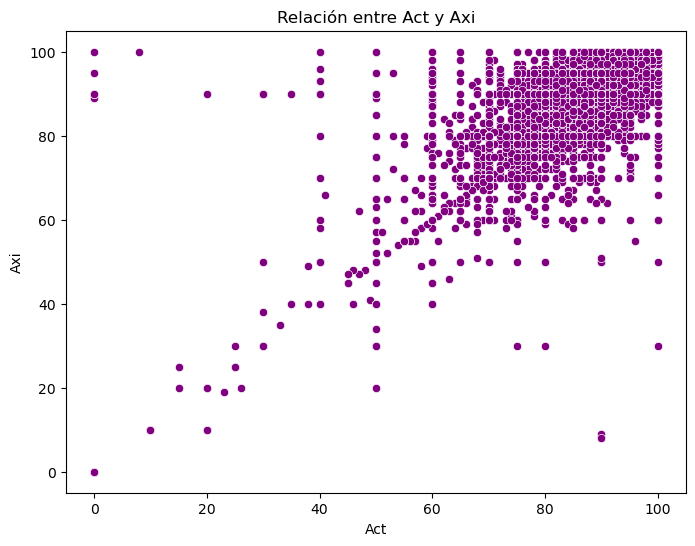

- Coeficiente de correlación de Pearson entre Act y Axi: 0.74
- Coeficiente de correlación de Spearman entre Act y Axi: 0.72

Resumen de los resultados:
  Columna 1 Columna 2  Coef. Pearson  Coef. Spearman
0       Act       Axi       0.738012        0.717349

Estadísticas descriptivas de la columna 'Act':
count    32676.000000
mean        88.159750
std          8.995464
min          0.000000
25%         85.000000
50%         90.000000
75%         95.000000
max        100.000000
Name: Act, dtype: float64

Estadísticas descriptivas de la columna 'Resultado':
count    32676.000000
mean        85.386002
std          8.331330
min          5.000000
25%         81.000000
50%         87.000000
75%         91.000000
max        100.000000
Name: Resultado, dtype: float64


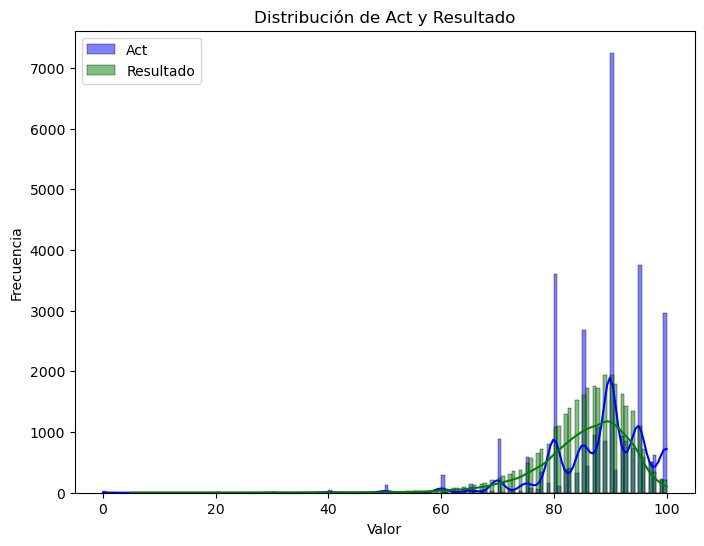

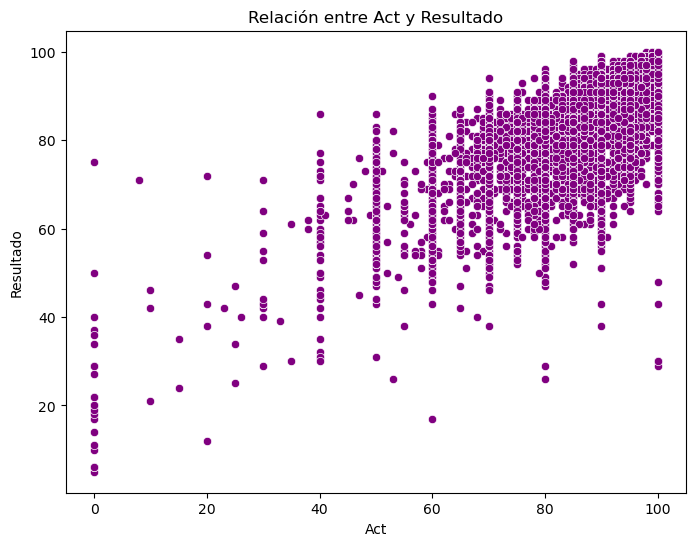

- Coeficiente de correlación de Pearson entre Act y Resultado: 0.70
- Coeficiente de correlación de Spearman entre Act y Resultado: 0.67

Resumen de los resultados:
  Columna 1  Columna 2  Coef. Pearson  Coef. Spearman
0       Act  Resultado       0.702191        0.673178

Estadísticas descriptivas de la columna 'Axi':
count    32676.000000
mean        89.829722
std          8.319957
min          0.000000
25%         87.000000
50%         90.000000
75%         95.000000
max        100.000000
Name: Axi, dtype: float64

Estadísticas descriptivas de la columna 'Intensidad_Horaria':
count    32676.000000
mean         2.738983
std          1.504686
min          1.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Intensidad_Horaria, dtype: float64


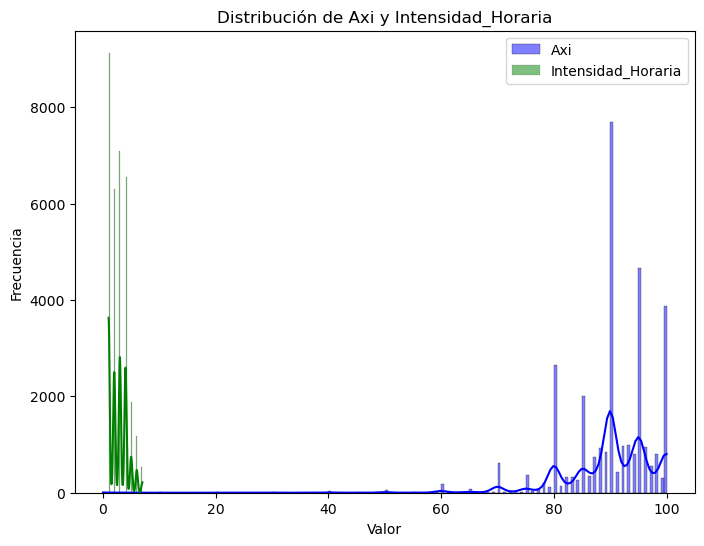

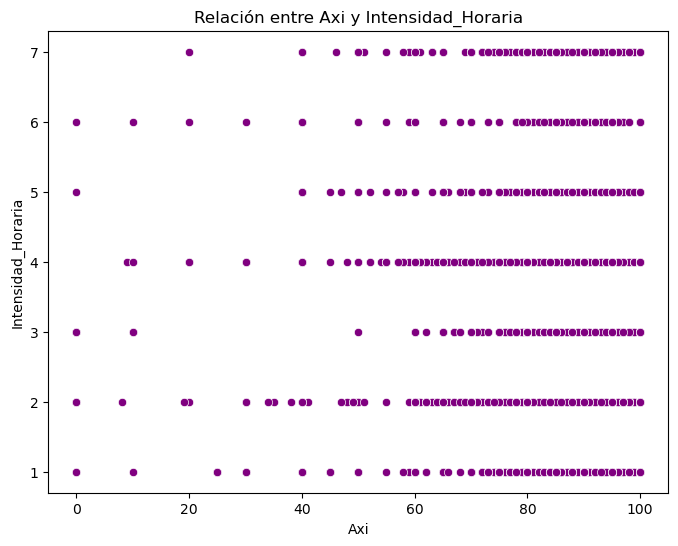

- Coeficiente de correlación de Pearson entre Axi y Intensidad_Horaria: -0.02
- Coeficiente de correlación de Spearman entre Axi y Intensidad_Horaria: 0.01

Resumen de los resultados:
  Columna 1           Columna 2  Coef. Pearson  Coef. Spearman
0       Axi  Intensidad_Horaria      -0.020643        0.005328

Estadísticas descriptivas de la columna 'Axi':
count    32676.000000
mean        89.829722
std          8.319957
min          0.000000
25%         87.000000
50%         90.000000
75%         95.000000
max        100.000000
Name: Axi, dtype: float64

Estadísticas descriptivas de la columna 'Cog':
count    32571.000000
mean        84.033250
std          9.603383
min          7.000000
25%         79.000000
50%         86.000000
75%         91.000000
max        100.000000
Name: Cog, dtype: float64


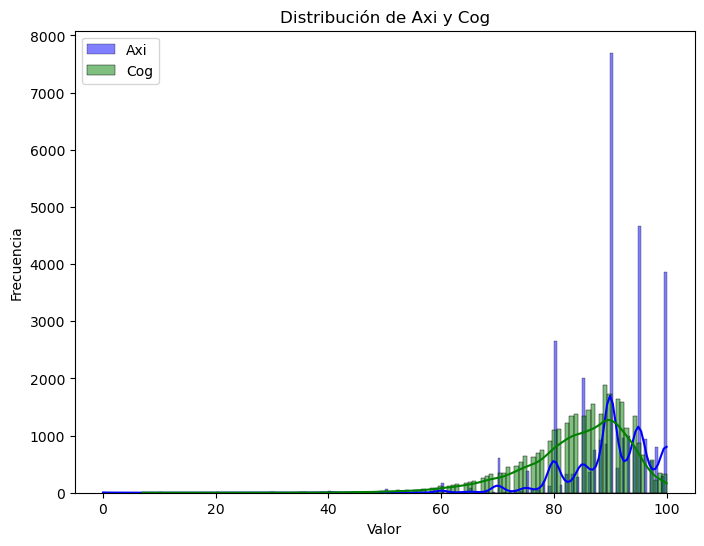

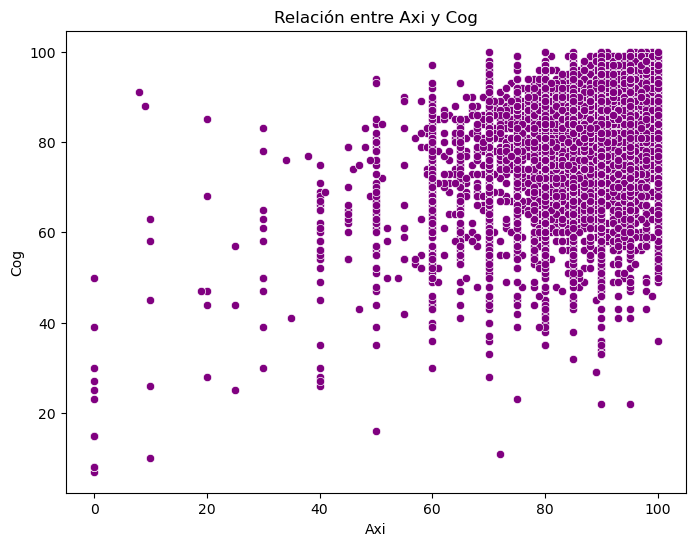

- Coeficiente de correlación de Pearson entre Axi y Cog: 0.42
- Coeficiente de correlación de Spearman entre Axi y Cog: 0.38

Resumen de los resultados:
  Columna 1 Columna 2  Coef. Pearson  Coef. Spearman
0       Axi       Cog       0.417411        0.382992

Estadísticas descriptivas de la columna 'Axi':
count    32676.000000
mean        89.829722
std          8.319957
min          0.000000
25%         87.000000
50%         90.000000
75%         95.000000
max        100.000000
Name: Axi, dtype: float64

Estadísticas descriptivas de la columna 'Proc':
count    32571.000000
mean        83.779743
std         10.031476
min          7.000000
25%         79.000000
50%         86.000000
75%         91.000000
max        100.000000
Name: Proc, dtype: float64


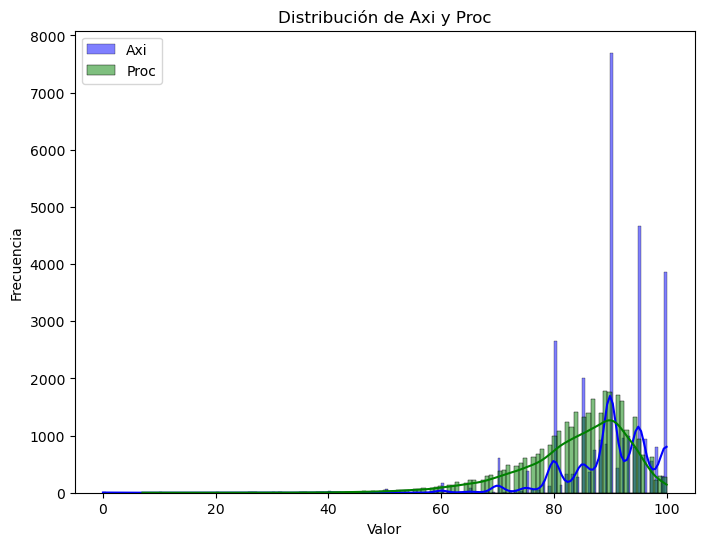

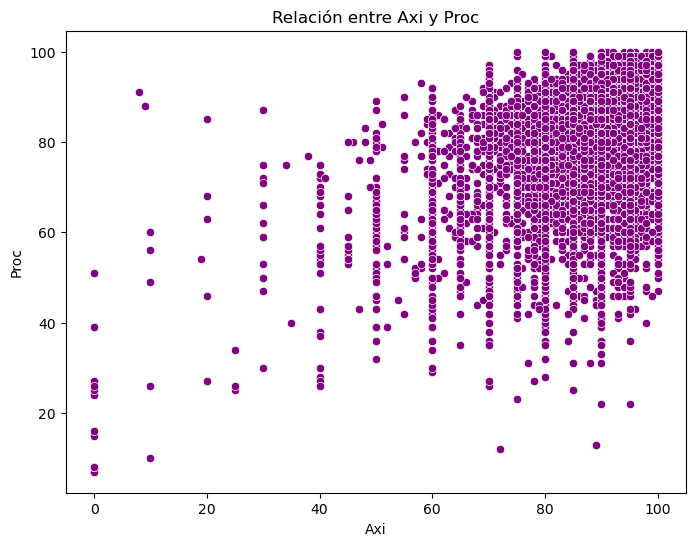

- Coeficiente de correlación de Pearson entre Axi y Proc: 0.43
- Coeficiente de correlación de Spearman entre Axi y Proc: 0.39

Resumen de los resultados:
  Columna 1 Columna 2  Coef. Pearson  Coef. Spearman
0       Axi      Proc       0.425534         0.39309

Estadísticas descriptivas de la columna 'Axi':
count    32676.000000
mean        89.829722
std          8.319957
min          0.000000
25%         87.000000
50%         90.000000
75%         95.000000
max        100.000000
Name: Axi, dtype: float64

Estadísticas descriptivas de la columna 'Act':
count    32676.000000
mean        88.159750
std          8.995464
min          0.000000
25%         85.000000
50%         90.000000
75%         95.000000
max        100.000000
Name: Act, dtype: float64


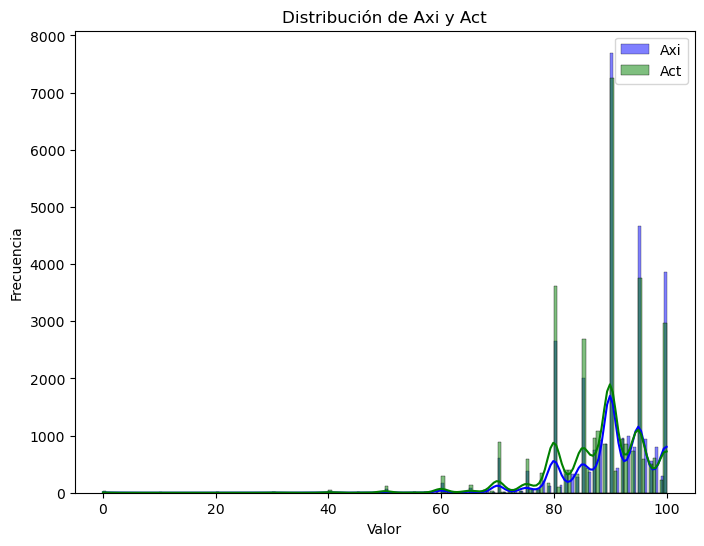

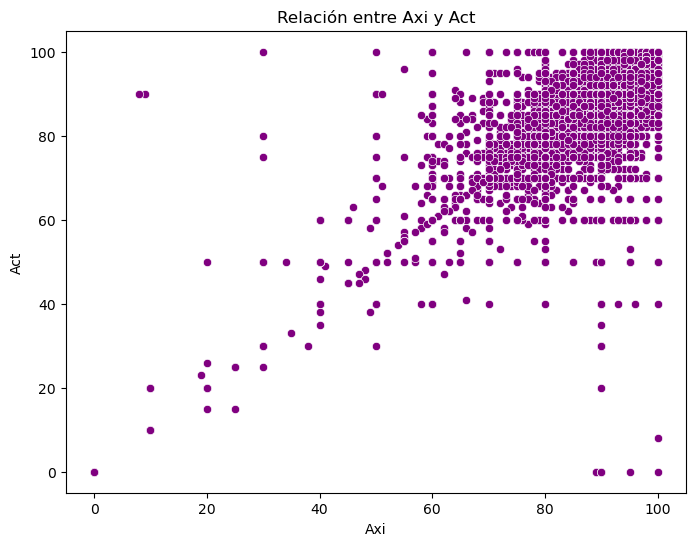

- Coeficiente de correlación de Pearson entre Axi y Act: 0.74
- Coeficiente de correlación de Spearman entre Axi y Act: 0.72

Resumen de los resultados:
  Columna 1 Columna 2  Coef. Pearson  Coef. Spearman
0       Axi       Act       0.738012        0.717349

Estadísticas descriptivas de la columna 'Axi':
count    32676.000000
mean        89.829722
std          8.319957
min          0.000000
25%         87.000000
50%         90.000000
75%         95.000000
max        100.000000
Name: Axi, dtype: float64

Estadísticas descriptivas de la columna 'Resultado':
count    32676.000000
mean        85.386002
std          8.331330
min          5.000000
25%         81.000000
50%         87.000000
75%         91.000000
max        100.000000
Name: Resultado, dtype: float64


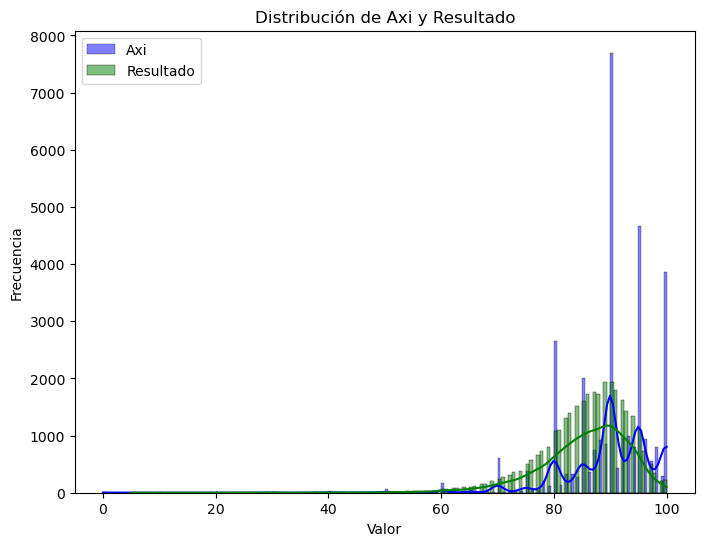

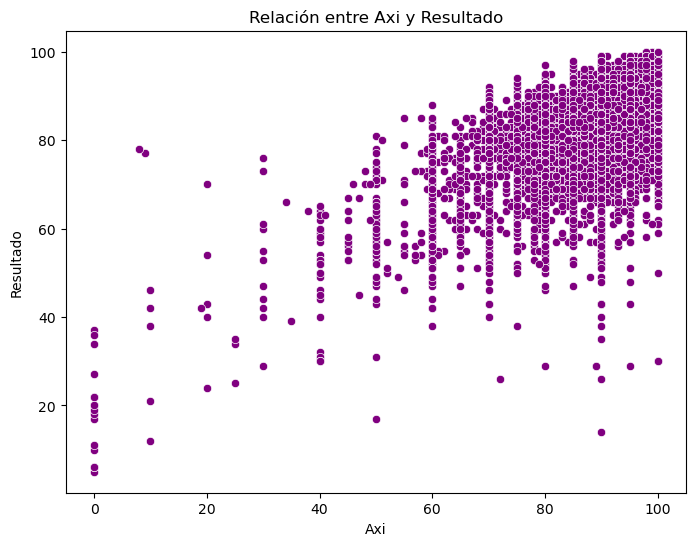

- Coeficiente de correlación de Pearson entre Axi y Resultado: 0.62
- Coeficiente de correlación de Spearman entre Axi y Resultado: 0.57

Resumen de los resultados:
  Columna 1  Columna 2  Coef. Pearson  Coef. Spearman
0       Axi  Resultado        0.62026        0.566531

Estadísticas descriptivas de la columna 'Resultado':
count    32676.000000
mean        85.386002
std          8.331330
min          5.000000
25%         81.000000
50%         87.000000
75%         91.000000
max        100.000000
Name: Resultado, dtype: float64

Estadísticas descriptivas de la columna 'Intensidad_Horaria':
count    32676.000000
mean         2.738983
std          1.504686
min          1.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Intensidad_Horaria, dtype: float64


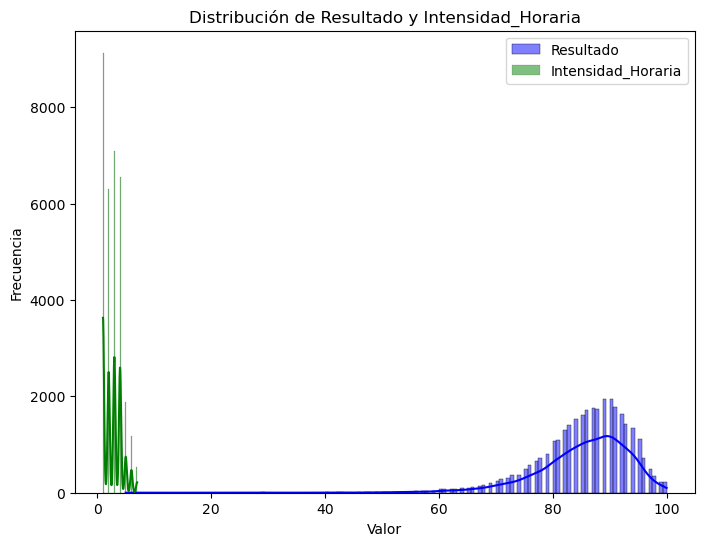

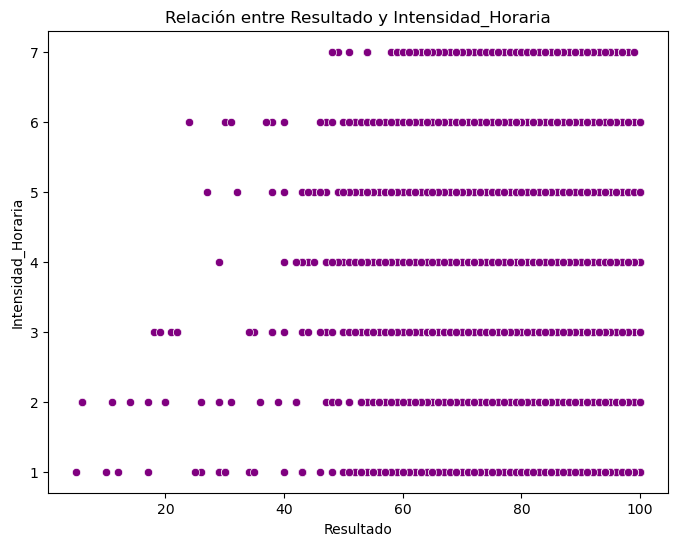

- Coeficiente de correlación de Pearson entre Resultado y Intensidad_Horaria: -0.26
- Coeficiente de correlación de Spearman entre Resultado y Intensidad_Horaria: -0.27

Resumen de los resultados:
   Columna 1           Columna 2  Coef. Pearson  Coef. Spearman
0  Resultado  Intensidad_Horaria       -0.25613       -0.274722

Estadísticas descriptivas de la columna 'Resultado':
count    32676.000000
mean        85.386002
std          8.331330
min          5.000000
25%         81.000000
50%         87.000000
75%         91.000000
max        100.000000
Name: Resultado, dtype: float64

Estadísticas descriptivas de la columna 'Cog':
count    32571.000000
mean        84.033250
std          9.603383
min          7.000000
25%         79.000000
50%         86.000000
75%         91.000000
max        100.000000
Name: Cog, dtype: float64


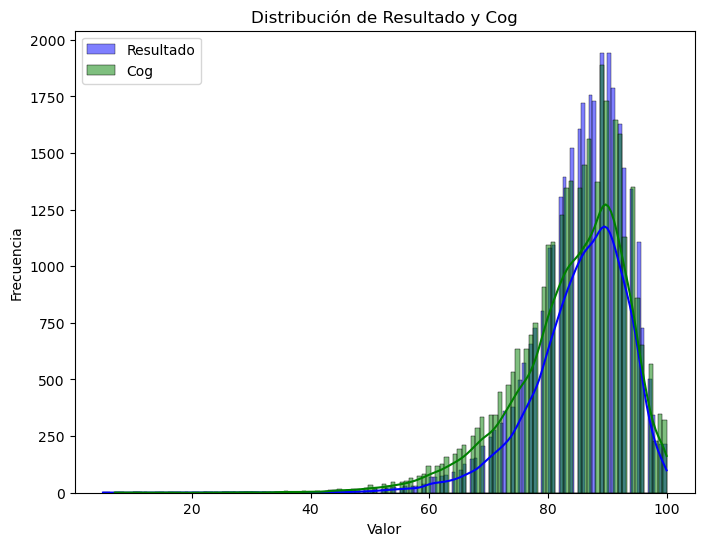

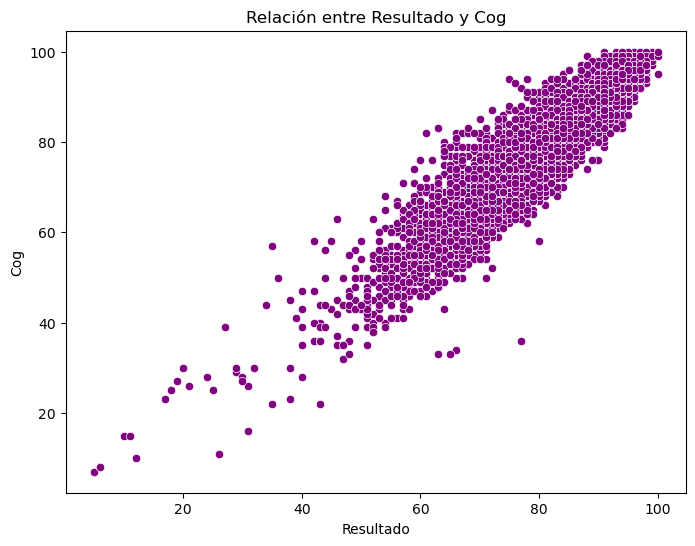

- Coeficiente de correlación de Pearson entre Resultado y Cog: 0.94
- Coeficiente de correlación de Spearman entre Resultado y Cog: 0.94

Resumen de los resultados:
   Columna 1 Columna 2  Coef. Pearson  Coef. Spearman
0  Resultado       Cog       0.944115        0.944834

Estadísticas descriptivas de la columna 'Resultado':
count    32676.000000
mean        85.386002
std          8.331330
min          5.000000
25%         81.000000
50%         87.000000
75%         91.000000
max        100.000000
Name: Resultado, dtype: float64

Estadísticas descriptivas de la columna 'Proc':
count    32571.000000
mean        83.779743
std         10.031476
min          7.000000
25%         79.000000
50%         86.000000
75%         91.000000
max        100.000000
Name: Proc, dtype: float64


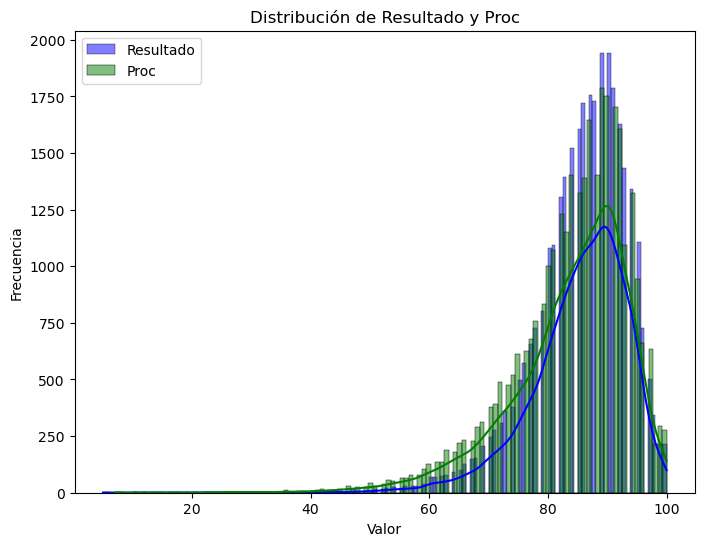

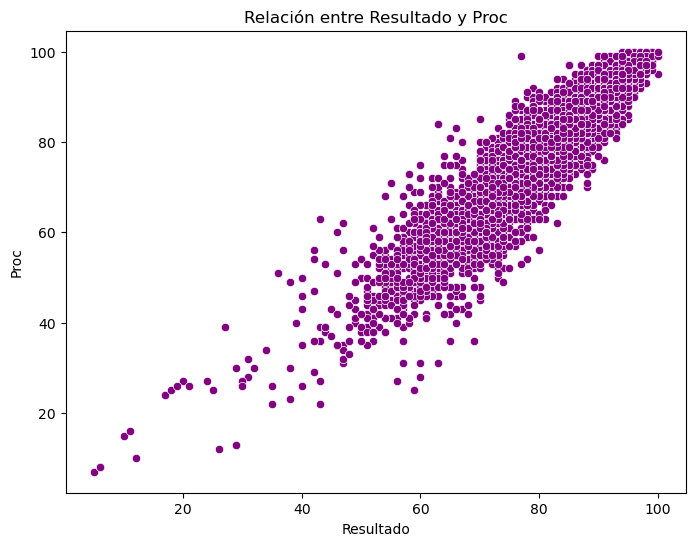

- Coeficiente de correlación de Pearson entre Resultado y Proc: 0.95
- Coeficiente de correlación de Spearman entre Resultado y Proc: 0.95

Resumen de los resultados:
   Columna 1 Columna 2  Coef. Pearson  Coef. Spearman
0  Resultado      Proc       0.950803        0.952052

Estadísticas descriptivas de la columna 'Resultado':
count    32676.000000
mean        85.386002
std          8.331330
min          5.000000
25%         81.000000
50%         87.000000
75%         91.000000
max        100.000000
Name: Resultado, dtype: float64

Estadísticas descriptivas de la columna 'Act':
count    32676.000000
mean        88.159750
std          8.995464
min          0.000000
25%         85.000000
50%         90.000000
75%         95.000000
max        100.000000
Name: Act, dtype: float64


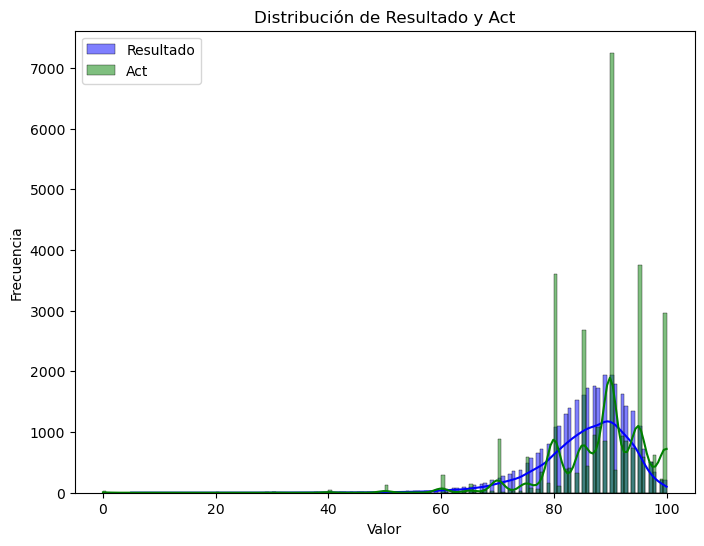

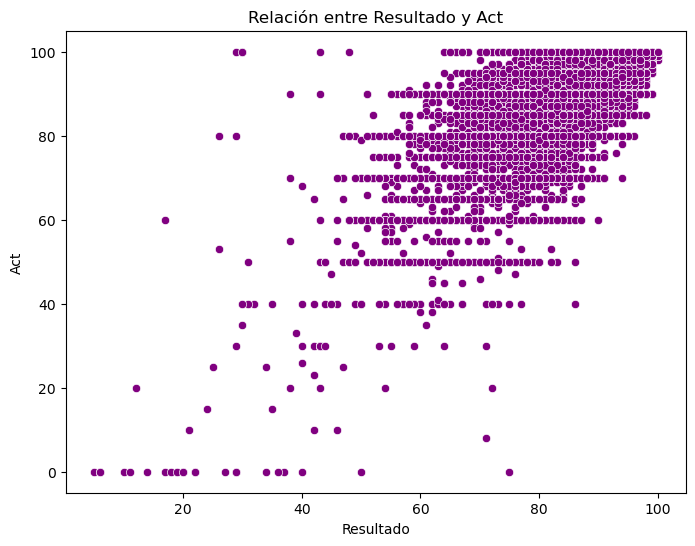

- Coeficiente de correlación de Pearson entre Resultado y Act: 0.70
- Coeficiente de correlación de Spearman entre Resultado y Act: 0.67

Resumen de los resultados:
   Columna 1 Columna 2  Coef. Pearson  Coef. Spearman
0  Resultado       Act       0.702191        0.673178

Estadísticas descriptivas de la columna 'Resultado':
count    32676.000000
mean        85.386002
std          8.331330
min          5.000000
25%         81.000000
50%         87.000000
75%         91.000000
max        100.000000
Name: Resultado, dtype: float64

Estadísticas descriptivas de la columna 'Axi':
count    32676.000000
mean        89.829722
std          8.319957
min          0.000000
25%         87.000000
50%         90.000000
75%         95.000000
max        100.000000
Name: Axi, dtype: float64


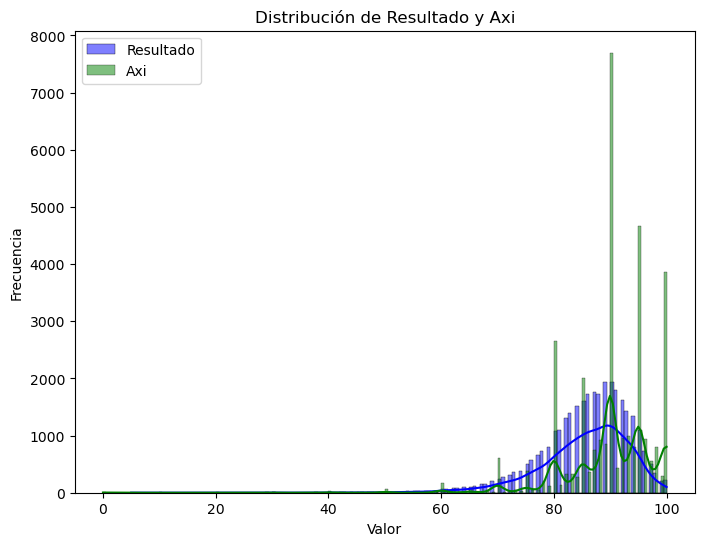

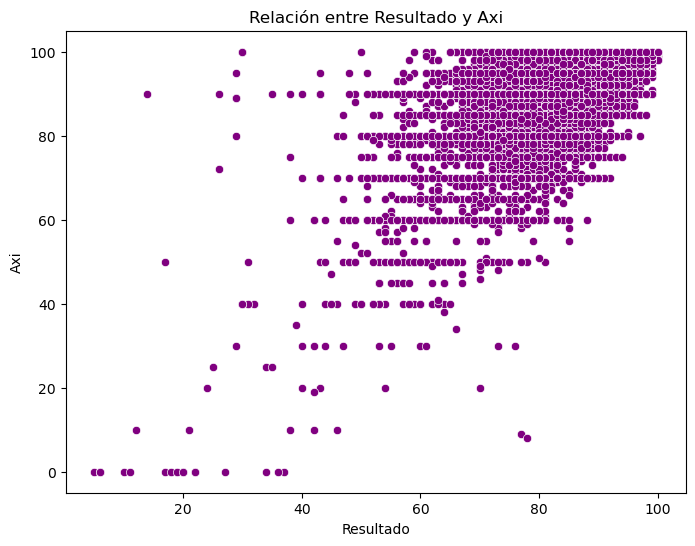

- Coeficiente de correlación de Pearson entre Resultado y Axi: 0.62
- Coeficiente de correlación de Spearman entre Resultado y Axi: 0.57

Resumen de los resultados:
   Columna 1 Columna 2  Coef. Pearson  Coef. Spearman
0  Resultado       Axi        0.62026        0.566531


In [30]:
numeric_cols = df_limpio.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df_limpio.select_dtypes(include=['object']).columns.tolist()
# Llamar la función para dos variables numéricas
for col in numeric_cols:
    for col2 in numeric_cols:
        if col != col2:
            # Llamar a la función para dos variables numéricas
            eda_num_bivariado_notes=eda.analisis_bivariado( col, col2)
eda_num_bivariado_notes.to_csv("../../data/processed/eda_bivariado_numeric_notes.csv", index=False)
    


2. Análisis Bivariado: Variables Categóricas vs Categóricas
Cuando las dos variables son categóricas, se analiza la relación a través de una tabla de contingencia y se calcula el test de chi-cuadrado.

In [31]:
# Llamar a la función para variable categóricas
for col in categorical_cols:
    for col2 in categorical_cols:
        if col != col2:
            # Llamar a la función para dos variables categóricas
            eda_cramers_v_notes=eda.cramers_v( col, col2)

eda_cramers_v_notes.to_csv("../../data/processed/eda_cramers_v_notes.csv", index=False)

3. Análisis Bivariado: Variables Numéricas vs Categóricas
Cuando se analiza una variable numérica con una categórica, se utiliza un gráfico de cajas y el test ANOVA para verificar si existen diferencias significativas.

In [32]:
# Llamar a la función para variable categóricas y numéricas
categorical_cols.remove('Estudiante')
categorical_cols.remove('Identificacion')
for col in numeric_cols:
    for col2 in categorical_cols:
        # Llamar a la función para variable categóricas y numéricas
        eda_anova_bivariado_notes=eda.analisis_bivariado_num_cat( col, col2)
eda_anova_bivariado_notes.to_csv("../../data/processed/eda_anova_bivariado_notes.csv", index=False)

ValueError: list.remove(x): x not in list

4. Análisis de Varianza (ANOVA)  
El siguiente análisis realiza pruebas de ANOVA entre todas las combinaciones de variables numéricas y categóricas en el dataset.

In [ ]:
eda_anova_notes=eda.realizar_anova()
eda_anova_notes.to_csv("../../data/processed/eda_anova_notes.csv", index=False)

## 2.4. Reporte EDA automatico

In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df_limpio, title="Reporte EDA de Notas", explorative=True)
profile.to_file("../../data/processed/eda_reporte_notas.html")

C:\Users\Cathe\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Summarize dataset:  79%|███████▉  | 19/24 [00:01<00:00, 16.40it/s, Calculate auto correlation]  c:\Users\Cathe\.conda\envs\cloud_computing\Lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 58.93it/s]


## 2.5. Reporte Sweetviz

In [ ]:
import sweetviz as sv

report = sv.analyze(df_limpio)
report.show_html("../../data/processed/sweetviz_reporte_notas.html")


Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)


Report ../../data/processed/sweetviz_reporte_notas.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
